In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('file:///C:/Users/Md%20Asif%20Ikbal/Downloads/diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
df.shape

(768, 9)

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
df.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

In [8]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [9]:
df.corr().describe().T

count      mean       std       min       25%  \
Pregnancies                 9.0  0.207326  0.355127 -0.081672 -0.033523   
Glucose                     9.0  0.306582  0.287678  0.057328  0.137337   
BloodPressure               9.0  0.246427  0.293757  0.041265  0.088933   
SkinThickness               9.0  0.239677  0.341550 -0.113970  0.057328   
Insulin                     9.0  0.250539  0.324265 -0.073535  0.088933   
BMI                         9.0  0.286731  0.293406  0.017683  0.140647   
DiabetesPedigreeFunction    9.0  0.206903  0.307331 -0.033523  0.041265   
Age                         9.0  0.244379  0.346347 -0.113970  0.033561   
Outcome                     9.0  0.295971  0.291143  0.065068  0.130548   

                               50%       75%  max  
Pregnancies               0.129459  0.221898  1.0  
Glucose                   0.221071  0.331357  1.0  
BloodPressure             0.152590  0.239528  1.0  
SkinThickness             0.183928  0.392573  1.0  
Insulin                   0.185071  0.331357  1.0  
BMI                       0.221071  0.292695  1.0  
DiabetesPedigreeFunction  0.140647  0.183928  1.0  
Age                       0.238356  0.263514  1.0  
Outcome                   0.221898  0.292695  1.0

In [10]:
df.mean()

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

In [11]:
df.min()

Pregnancies                  0.000
Glucose                      0.000
BloodPressure                0.000
SkinThickness                0.000
Insulin                      0.000
BMI                          0.000
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
dtype: float64

In [12]:
df.max()

Pregnancies                  17.00
Glucose                     199.00
BloodPressure               122.00
SkinThickness                99.00
Insulin                     846.00
BMI                          67.10
DiabetesPedigreeFunction      2.42
Age                          81.00
Outcome                       1.00
dtype: float64

In [13]:
for i  in df.columns:
    print(f'unique values in column "{i}" is\n {df[i].value_counts()}')
    print('-------------------------------------------------')

unique values in column "Pregnancies" is
 1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64
-------------------------------------------------
unique values in column "Glucose" is
 99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: Glucose, Length: 136, dtype: int64
-------------------------------------------------
unique values in column "BloodPressure" is
 70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61 

In [14]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [98]:
x=df.drop(['Outcome'],axis='columns')
y=df.Outcome.values

In [99]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

In [100]:
lo=LogisticRegression()
lo.fit(xtrain,ytrain)
pred_lo=lo.predict(xtest)
accu_lo=accuracy_score(ytest,pred_lo)*100
accu_lo

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


77.92207792207793

In [101]:
print(classification_report(ytest,pred_lo))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       157
           1       0.71      0.53      0.60        74

    accuracy                           0.78       231
   macro avg       0.76      0.71      0.73       231
weighted avg       0.77      0.78      0.77       231



In [102]:
tre=DecisionTreeClassifier()
tre.fit(xtrain,ytrain)
pred_tre=tre.predict(xtest)
accu_tre=accuracy_score(ytest,pred_tre)*100
accu_tre

73.16017316017316

In [103]:
print(classification_report(ytest,pred_tre))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80       157
           1       0.58      0.59      0.59        74

    accuracy                           0.73       231
   macro avg       0.69      0.70      0.69       231
weighted avg       0.73      0.73      0.73       231



In [104]:
kne=KNeighborsClassifier()
kne.fit(xtrain,ytrain)
pred_kne=kne.predict(xtest)
accu_kne=accuracy_score(ytest,pred_kne)*100
accu_kne

74.89177489177489

In [105]:
print(classification_report(ytest,pred_kne))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       157
           1       0.63      0.53      0.57        74

    accuracy                           0.75       231
   macro avg       0.71      0.69      0.70       231
weighted avg       0.74      0.75      0.74       231



In [106]:
from sklearn.ensemble import AdaBoostClassifier

In [107]:
ada=AdaBoostClassifier()
ada.fit(xtrain,ytrain)
pred_ada=ada.predict(xtest)
accu_ada=accuracy_score(ytest,pred_ada)*100
accu_ada

75.32467532467533

In [108]:
print(classification_report(ytest,pred_ada))

              precision    recall  f1-score   support

           0       0.79      0.86      0.83       157
           1       0.64      0.53      0.58        74

    accuracy                           0.75       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.74      0.75      0.75       231



In [109]:
from sklearn.ensemble import BaggingClassifier

In [110]:
bag=BaggingClassifier()
bag.fit(xtrain,ytrain)
pred_bag=bag.predict(xtest)
accu_bag=accuracy_score(ytest,pred_bag)*100
accu_bag

77.92207792207793

In [111]:
print(classification_report(ytest,pred_bag))

              precision    recall  f1-score   support

           0       0.80      0.89      0.85       157
           1       0.70      0.54      0.61        74

    accuracy                           0.78       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.77      0.78      0.77       231



In [112]:
from sklearn.naive_bayes import GaussianNB

In [113]:
gau=GaussianNB()
gau.fit(xtrain,ytrain)
pred_gau=gau.predict(xtest)
accu_l=accuracy_score(ytest,pred_gau)*100
accu_l

76.19047619047619

In [114]:
print(classification_report(ytest,pred_gau))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       157
           1       0.67      0.51      0.58        74

    accuracy                           0.76       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.75      0.76      0.75       231



In [115]:
from sklearn.ensemble import ExtraTreesClassifier

In [116]:
etc=ExtraTreesClassifier()
etc.fit(xtrain,ytrain)
pred_etc=etc.predict(xtest)
accu_etc=accuracy_score(ytest,pred_etc)*100
accu_etc

76.62337662337663

In [117]:
print(classification_report(ytest,pred_etc))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84       157
           1       0.67      0.54      0.60        74

    accuracy                           0.77       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.76      0.77      0.76       231



In [118]:
from sklearn.svm import SVC

In [119]:
svc=SVC()
svc.fit(xtrain,ytrain)
pred_svc=svc.predict(xtest)
accu_svc=accuracy_score(ytest,pred_svc)*100
accu_svc

75.32467532467533

In [120]:
print(classification_report(ytest,pred_svc))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       157
           1       0.68      0.43      0.53        74

    accuracy                           0.75       231
   macro avg       0.73      0.67      0.68       231
weighted avg       0.74      0.75      0.74       231



In [121]:
from sklearn.ensemble import RandomForestClassifier

In [122]:
rnd=RandomForestClassifier()
rnd.fit(xtrain,ytrain)
pred_rnd=rnd.predict(xtest)
accu_rnd=accuracy_score(ytest,pred_rnd)*100
accu_rnd

76.62337662337663

In [123]:
print(classification_report(ytest,pred_rnd))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       157
           1       0.66      0.55      0.60        74

    accuracy                           0.77       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.76      0.77      0.76       231



In [124]:
from catboost import CatBoostClassifier

In [125]:
cat=CatBoostClassifier()
cat.fit(xtrain,ytrain)

Learning rate set to 0.0079
0:	learn: 0.6888649	total: 85.8ms	remaining: 1m 25s
1:	learn: 0.6854360	total: 89.9ms	remaining: 44.9s
2:	learn: 0.6814001	total: 94ms	remaining: 31.2s
3:	learn: 0.6772592	total: 99ms	remaining: 24.7s
4:	learn: 0.6737278	total: 103ms	remaining: 20.4s
5:	learn: 0.6693814	total: 106ms	remaining: 17.5s
6:	learn: 0.6653448	total: 108ms	remaining: 15.4s
7:	learn: 0.6616429	total: 111ms	remaining: 13.8s
8:	learn: 0.6575605	total: 114ms	remaining: 12.5s
9:	learn: 0.6548941	total: 116ms	remaining: 11.5s
10:	learn: 0.6509512	total: 119ms	remaining: 10.7s
11:	learn: 0.6479431	total: 122ms	remaining: 10s
12:	learn: 0.6439033	total: 125ms	remaining: 9.49s
13:	learn: 0.6398914	total: 129ms	remaining: 9.09s
14:	learn: 0.6367790	total: 132ms	remaining: 8.63s
15:	learn: 0.6341595	total: 134ms	remaining: 8.25s
16:	learn: 0.6317238	total: 137ms	remaining: 7.92s
17:	learn: 0.6289328	total: 140ms	remaining: 7.61s
18:	learn: 0.6257272	total: 142ms	remaining: 7.33s
19:	learn: 0.6

191:	learn: 0.4086136	total: 589ms	remaining: 2.48s
192:	learn: 0.4080683	total: 591ms	remaining: 2.47s
193:	learn: 0.4075778	total: 594ms	remaining: 2.47s
194:	learn: 0.4070965	total: 597ms	remaining: 2.46s
195:	learn: 0.4064684	total: 600ms	remaining: 2.46s
196:	learn: 0.4061422	total: 602ms	remaining: 2.45s
197:	learn: 0.4058455	total: 606ms	remaining: 2.45s
198:	learn: 0.4053565	total: 608ms	remaining: 2.45s
199:	learn: 0.4049176	total: 611ms	remaining: 2.44s
200:	learn: 0.4043343	total: 615ms	remaining: 2.44s
201:	learn: 0.4038346	total: 618ms	remaining: 2.44s
202:	learn: 0.4031286	total: 622ms	remaining: 2.44s
203:	learn: 0.4024902	total: 625ms	remaining: 2.44s
204:	learn: 0.4019238	total: 627ms	remaining: 2.43s
205:	learn: 0.4016751	total: 630ms	remaining: 2.43s
206:	learn: 0.4010772	total: 632ms	remaining: 2.42s
207:	learn: 0.4006999	total: 635ms	remaining: 2.42s
208:	learn: 0.4002444	total: 637ms	remaining: 2.41s
209:	learn: 0.3997109	total: 639ms	remaining: 2.4s
210:	learn: 0

386:	learn: 0.3341402	total: 1.08s	remaining: 1.72s
387:	learn: 0.3337238	total: 1.09s	remaining: 1.72s
388:	learn: 0.3335582	total: 1.09s	remaining: 1.71s
389:	learn: 0.3333061	total: 1.09s	remaining: 1.71s
390:	learn: 0.3330746	total: 1.09s	remaining: 1.71s
391:	learn: 0.3327628	total: 1.1s	remaining: 1.7s
392:	learn: 0.3325826	total: 1.1s	remaining: 1.7s
393:	learn: 0.3323293	total: 1.1s	remaining: 1.7s
394:	learn: 0.3320825	total: 1.11s	remaining: 1.69s
395:	learn: 0.3314952	total: 1.11s	remaining: 1.69s
396:	learn: 0.3311825	total: 1.11s	remaining: 1.69s
397:	learn: 0.3309255	total: 1.12s	remaining: 1.69s
398:	learn: 0.3305879	total: 1.12s	remaining: 1.69s
399:	learn: 0.3301143	total: 1.12s	remaining: 1.68s
400:	learn: 0.3299480	total: 1.12s	remaining: 1.68s
401:	learn: 0.3296797	total: 1.13s	remaining: 1.67s
402:	learn: 0.3294276	total: 1.13s	remaining: 1.67s
403:	learn: 0.3290971	total: 1.13s	remaining: 1.67s
404:	learn: 0.3287911	total: 1.13s	remaining: 1.67s
405:	learn: 0.3285

581:	learn: 0.2856022	total: 1.58s	remaining: 1.14s
582:	learn: 0.2854129	total: 1.59s	remaining: 1.14s
583:	learn: 0.2851542	total: 1.59s	remaining: 1.13s
584:	learn: 0.2848480	total: 1.59s	remaining: 1.13s
585:	learn: 0.2844905	total: 1.6s	remaining: 1.13s
586:	learn: 0.2841921	total: 1.6s	remaining: 1.13s
587:	learn: 0.2840538	total: 1.6s	remaining: 1.12s
588:	learn: 0.2837234	total: 1.6s	remaining: 1.12s
589:	learn: 0.2832828	total: 1.61s	remaining: 1.12s
590:	learn: 0.2830626	total: 1.61s	remaining: 1.11s
591:	learn: 0.2829796	total: 1.61s	remaining: 1.11s
592:	learn: 0.2827290	total: 1.62s	remaining: 1.11s
593:	learn: 0.2824931	total: 1.62s	remaining: 1.11s
594:	learn: 0.2823715	total: 1.62s	remaining: 1.1s
595:	learn: 0.2822076	total: 1.62s	remaining: 1.1s
596:	learn: 0.2820711	total: 1.63s	remaining: 1.1s
597:	learn: 0.2817402	total: 1.63s	remaining: 1.09s
598:	learn: 0.2816025	total: 1.63s	remaining: 1.09s
599:	learn: 0.2814489	total: 1.63s	remaining: 1.09s
600:	learn: 0.28112

768:	learn: 0.2472408	total: 2.08s	remaining: 624ms
769:	learn: 0.2471735	total: 2.08s	remaining: 621ms
770:	learn: 0.2468876	total: 2.08s	remaining: 618ms
771:	learn: 0.2468089	total: 2.08s	remaining: 616ms
772:	learn: 0.2466468	total: 2.09s	remaining: 613ms
773:	learn: 0.2464214	total: 2.09s	remaining: 610ms
774:	learn: 0.2462713	total: 2.09s	remaining: 608ms
775:	learn: 0.2461383	total: 2.1s	remaining: 605ms
776:	learn: 0.2460218	total: 2.1s	remaining: 602ms
777:	learn: 0.2457993	total: 2.1s	remaining: 600ms
778:	learn: 0.2456850	total: 2.1s	remaining: 597ms
779:	learn: 0.2455279	total: 2.11s	remaining: 595ms
780:	learn: 0.2452358	total: 2.11s	remaining: 592ms
781:	learn: 0.2449495	total: 2.11s	remaining: 589ms
782:	learn: 0.2447901	total: 2.12s	remaining: 587ms
783:	learn: 0.2446628	total: 2.12s	remaining: 584ms
784:	learn: 0.2444570	total: 2.12s	remaining: 581ms
785:	learn: 0.2443237	total: 2.12s	remaining: 578ms
786:	learn: 0.2441204	total: 2.13s	remaining: 575ms
787:	learn: 0.24

967:	learn: 0.2128283	total: 2.57s	remaining: 85ms
968:	learn: 0.2126025	total: 2.57s	remaining: 82.3ms
969:	learn: 0.2124474	total: 2.58s	remaining: 79.7ms
970:	learn: 0.2121825	total: 2.58s	remaining: 77ms
971:	learn: 0.2120708	total: 2.58s	remaining: 74.3ms
972:	learn: 0.2119127	total: 2.58s	remaining: 71.7ms
973:	learn: 0.2117294	total: 2.59s	remaining: 69ms
974:	learn: 0.2116496	total: 2.59s	remaining: 66.4ms
975:	learn: 0.2114452	total: 2.59s	remaining: 63.7ms
976:	learn: 0.2112931	total: 2.6s	remaining: 61.1ms
977:	learn: 0.2111144	total: 2.6s	remaining: 58.5ms
978:	learn: 0.2110213	total: 2.6s	remaining: 55.8ms
979:	learn: 0.2108936	total: 2.6s	remaining: 53.1ms
980:	learn: 0.2108764	total: 2.61s	remaining: 50.5ms
981:	learn: 0.2106849	total: 2.61s	remaining: 47.8ms
982:	learn: 0.2105705	total: 2.61s	remaining: 45.2ms
983:	learn: 0.2104344	total: 2.61s	remaining: 42.5ms
984:	learn: 0.2102631	total: 2.62s	remaining: 39.8ms
985:	learn: 0.2101875	total: 2.62s	remaining: 37.2ms
986

In [126]:
cat.score(xtest,ytest)*100

76.62337662337663

In [127]:
models = pd.DataFrame({
    'Model': ['LogisticRegression','DecisionTreeClassifier','KNeighborsClassifier' , 
             'AdaBoostClassifier','BaggingClassifier','GaussianNB','AdaBoostClassifier','ExtraTreesClassifier','SVM','RandomForestClassifier'],
    'Score': [accu_lo,accu_tre, accu_kne, accu_ada,accu_bag,accu_l,accu_ada,accu_etc,accu_svc,accu_rnd]
})

models.sort_values(by = 'Score', ascending = False)

Model      Score
0      LogisticRegression  77.922078
4       BaggingClassifier  77.922078
7    ExtraTreesClassifier  76.623377
9  RandomForestClassifier  76.623377
5              GaussianNB  76.190476
3      AdaBoostClassifier  75.324675
6      AdaBoostClassifier  75.324675
8                     SVM  75.324675
2    KNeighborsClassifier  74.891775
1  DecisionTreeClassifier  73.160173

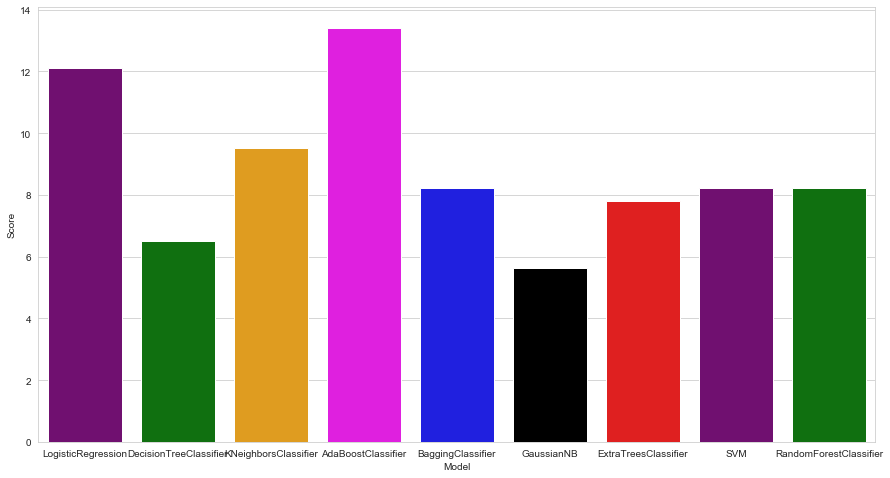

In [45]:
colors = ["purple", "green", "orange", "magenta","blue","black","red"]

sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Score'], palette=colors )
plt.show()

In [47]:
object_col=[]
num_col=[]
for i in df.columns:
    if df[i].dtype=='object':
        object_col.append(i)
    else:
        num_col.append(i)

In [48]:
object_col

[]

In [49]:
num_col

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [50]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

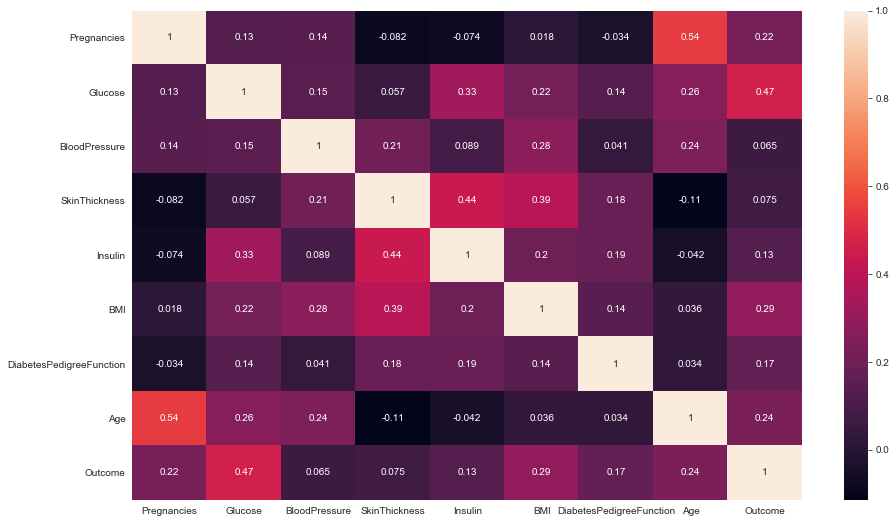

In [51]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True)

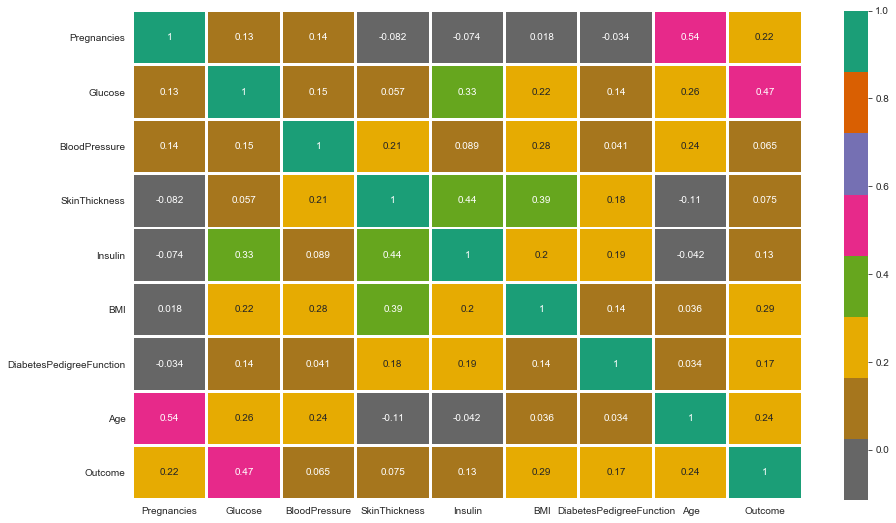

In [52]:
plt.figure(figsize=(15,9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=True,cmap='Dark2_r',linewidths=2)
plt.show()

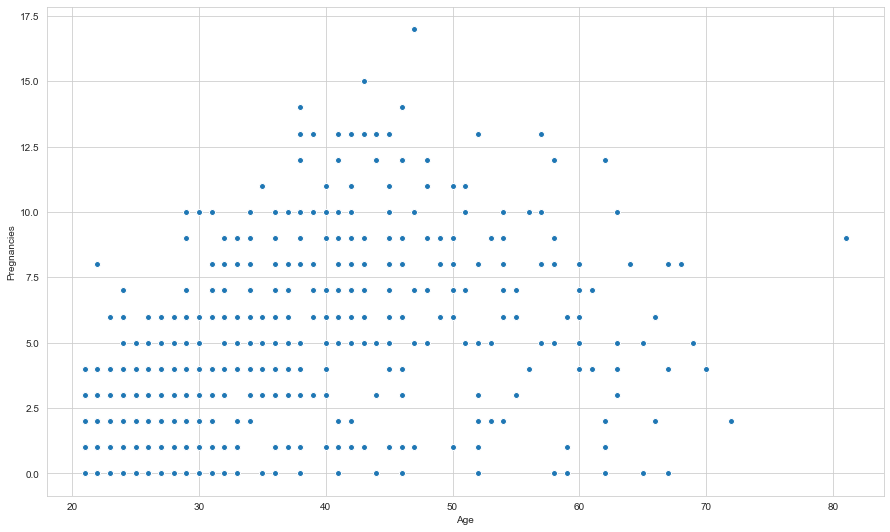

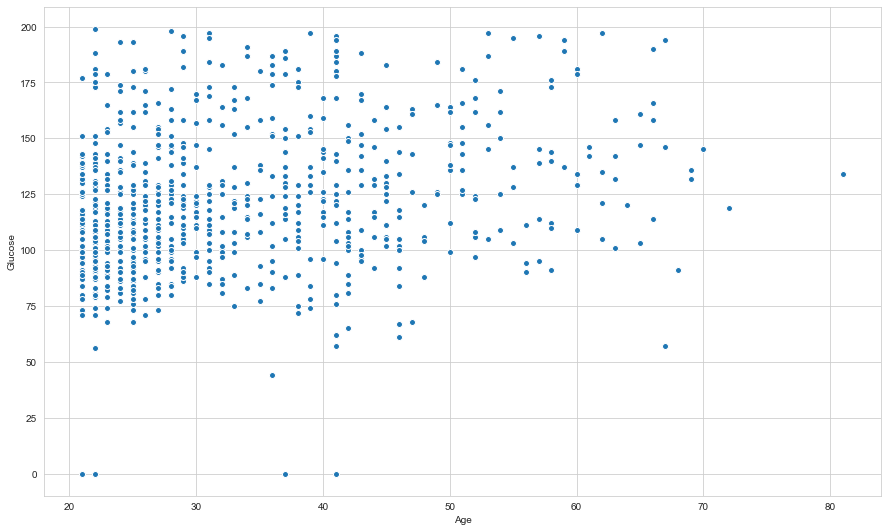

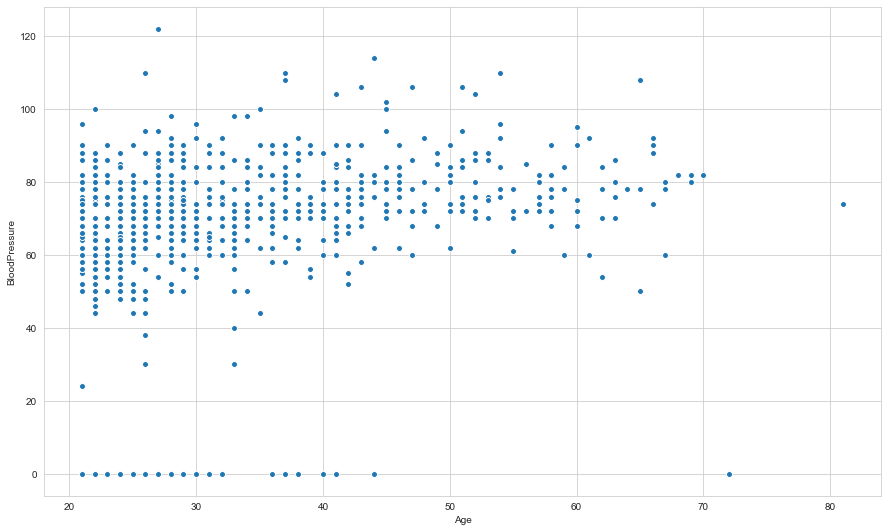

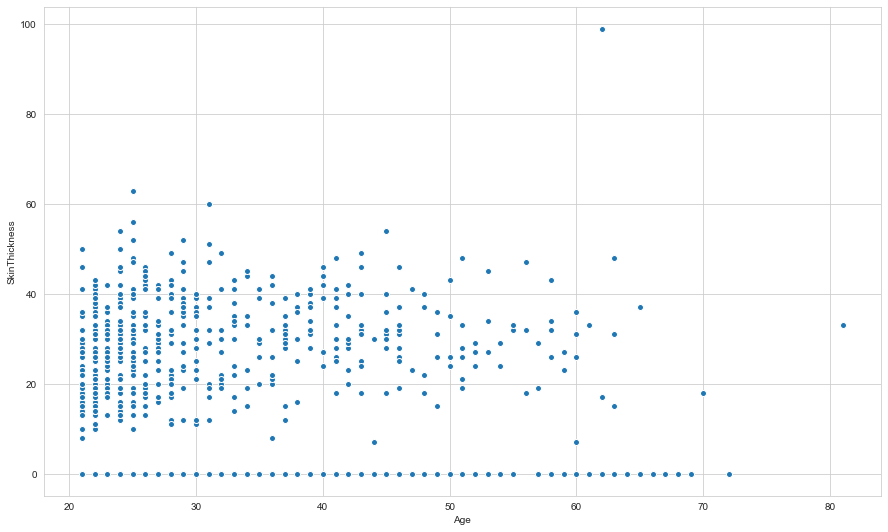

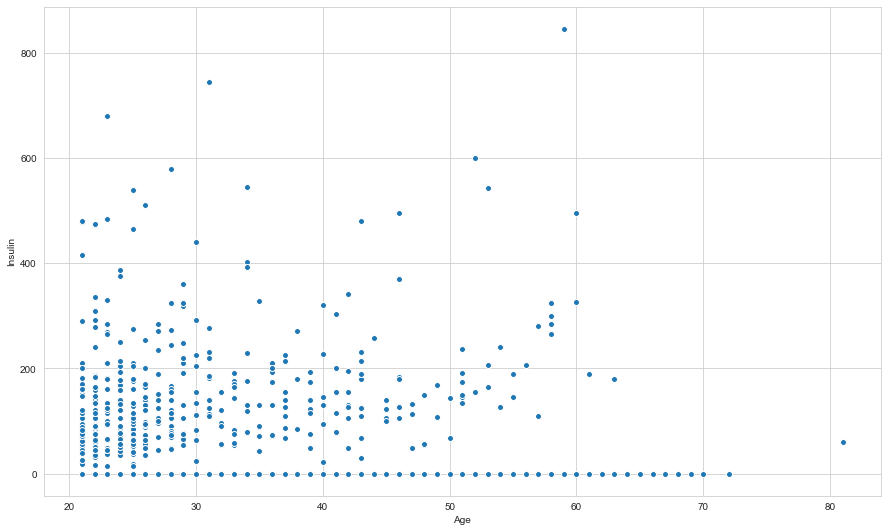

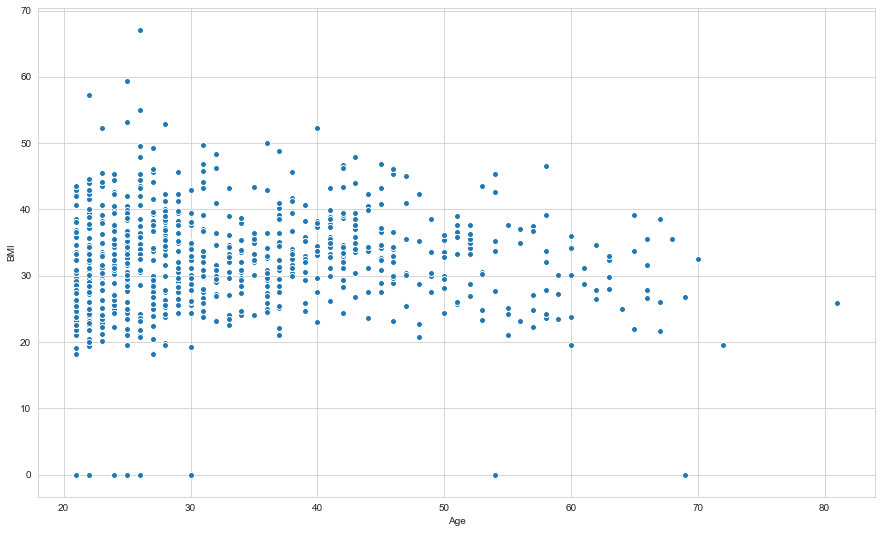

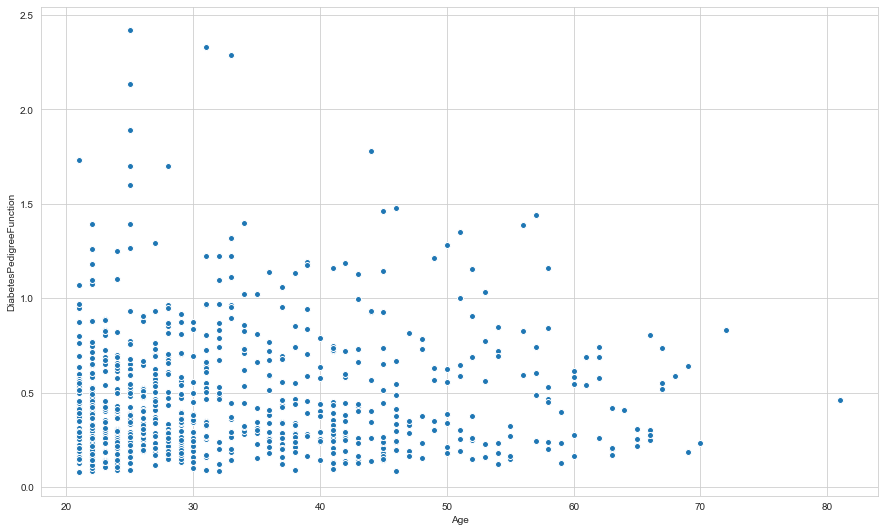

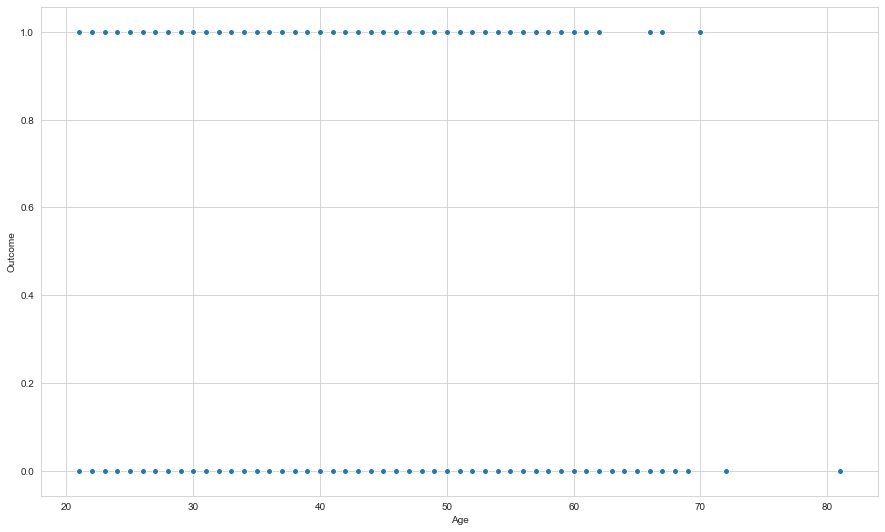

In [55]:
for i in ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Outcome']:
    plt.figure(figsize=(15,9))
    sns.scatterplot(x=df.Age,y=df[i],data=df,linewidth=1)
    plt.show()

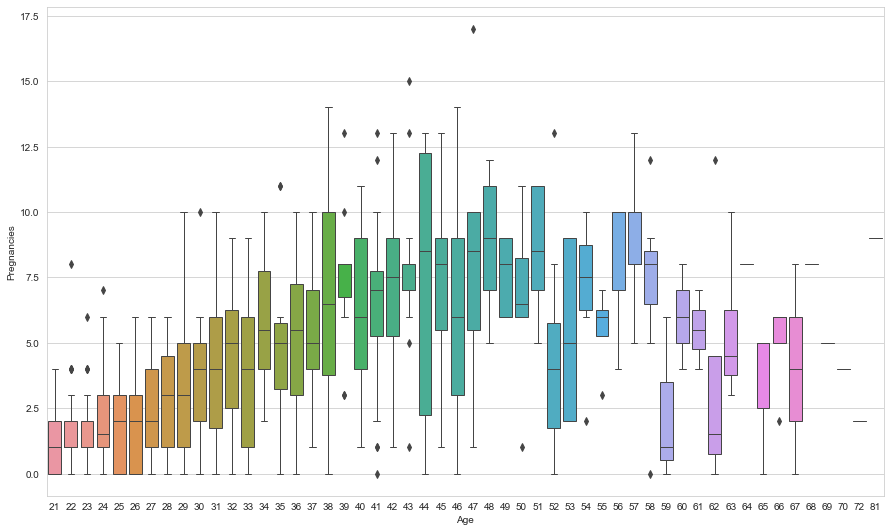

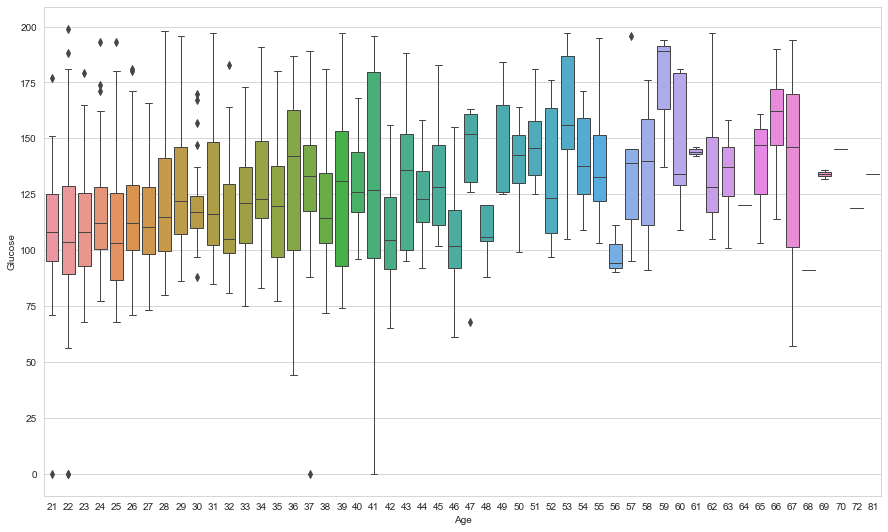

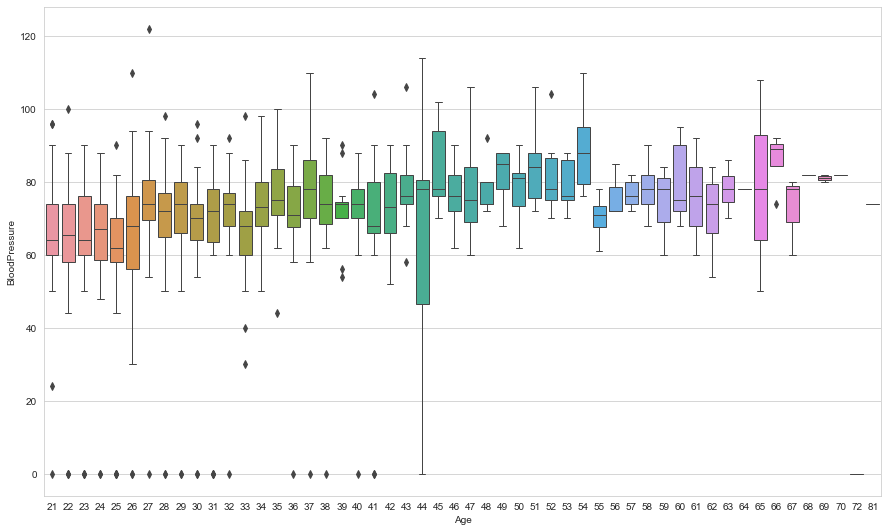

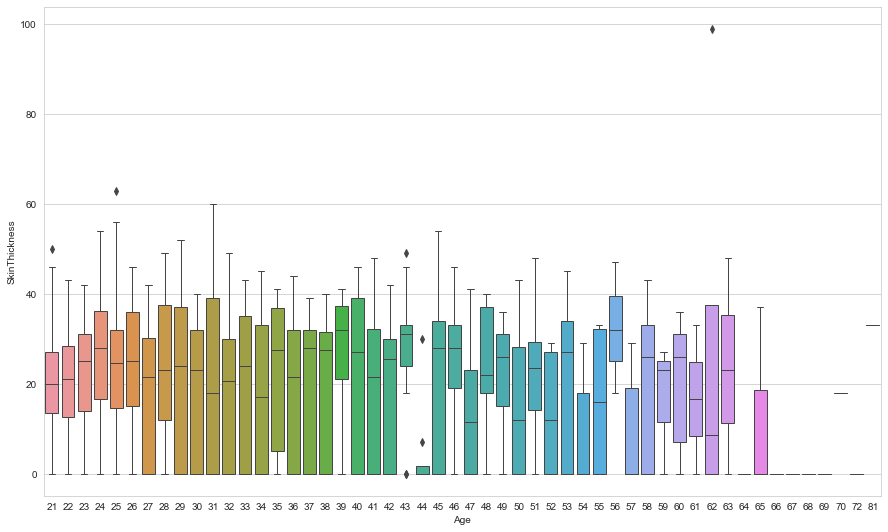

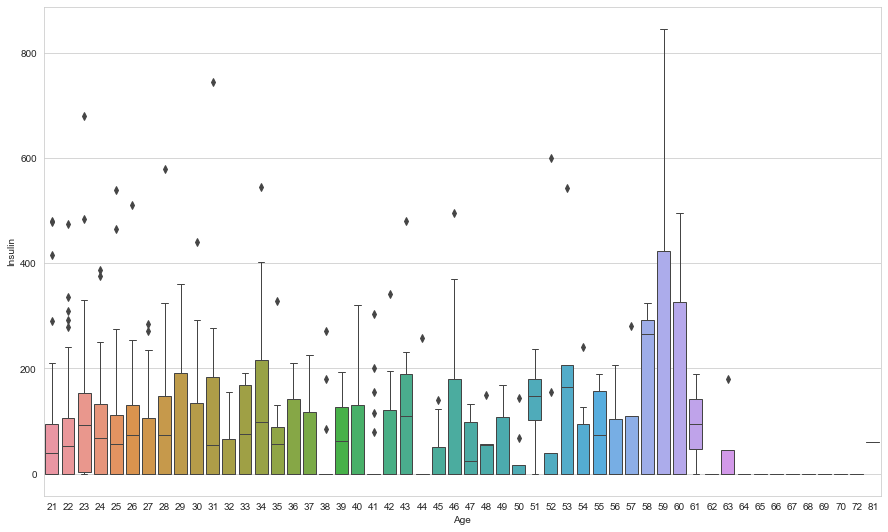

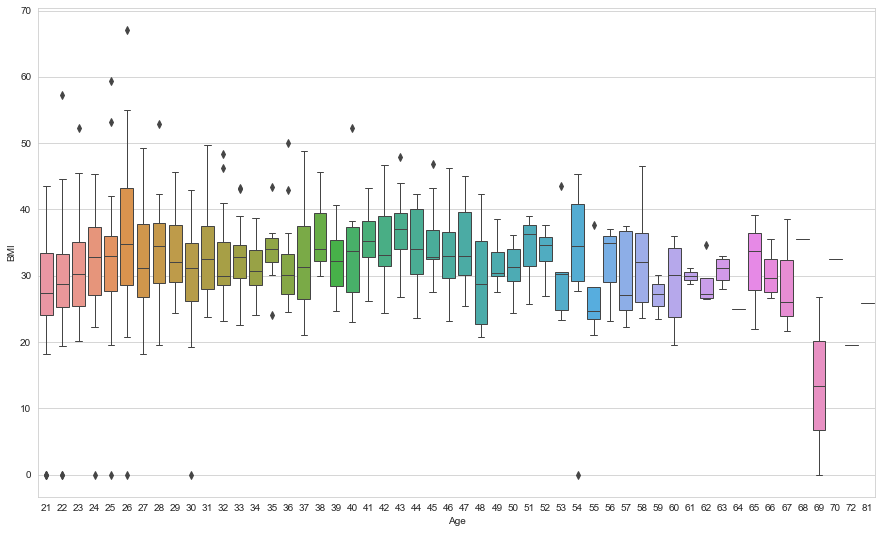

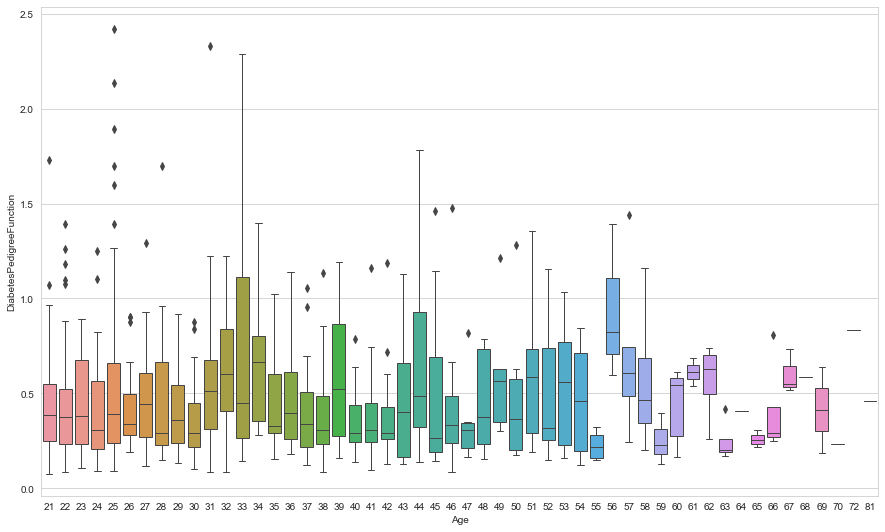

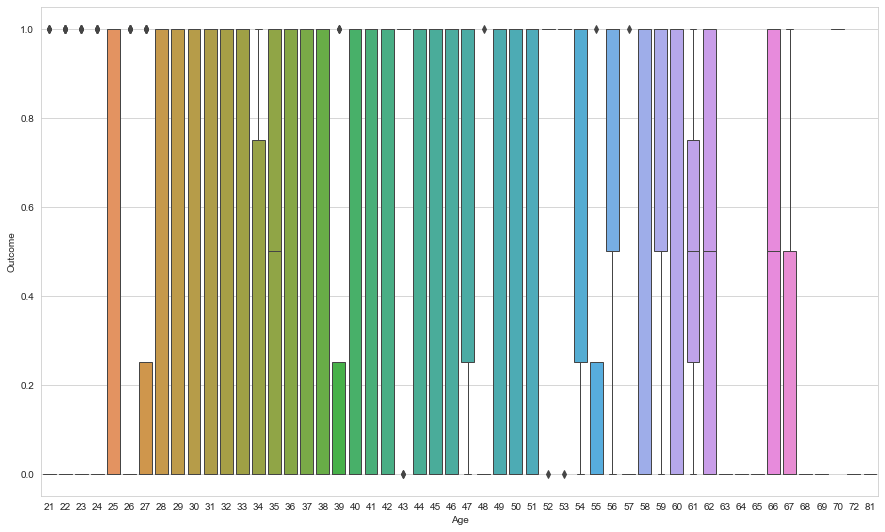

In [56]:
for i in ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Outcome']:
    plt.figure(figsize=(15,9))
    sns.boxplot(x=df.Age,y=df[i],data=df,linewidth=1)
    plt.show()

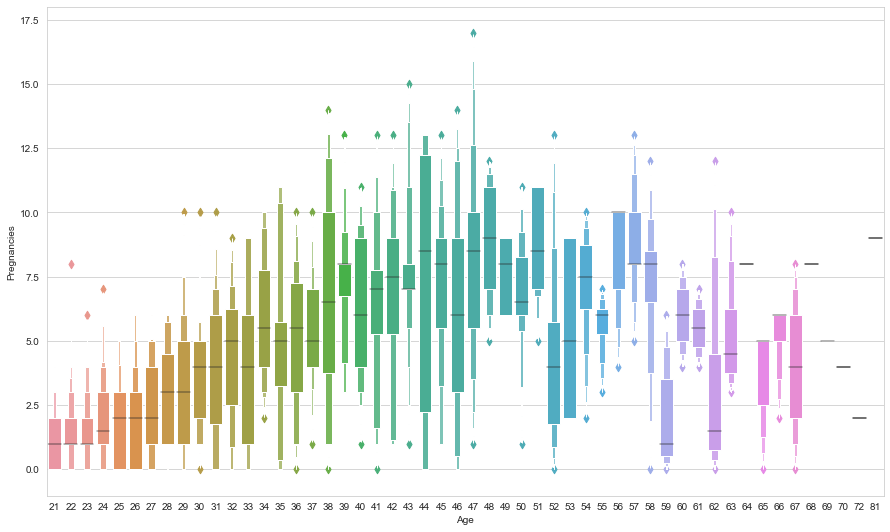

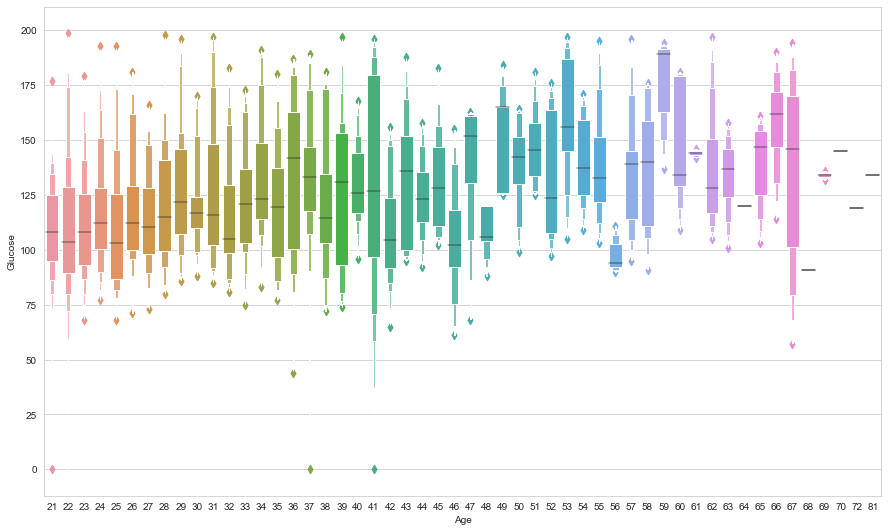

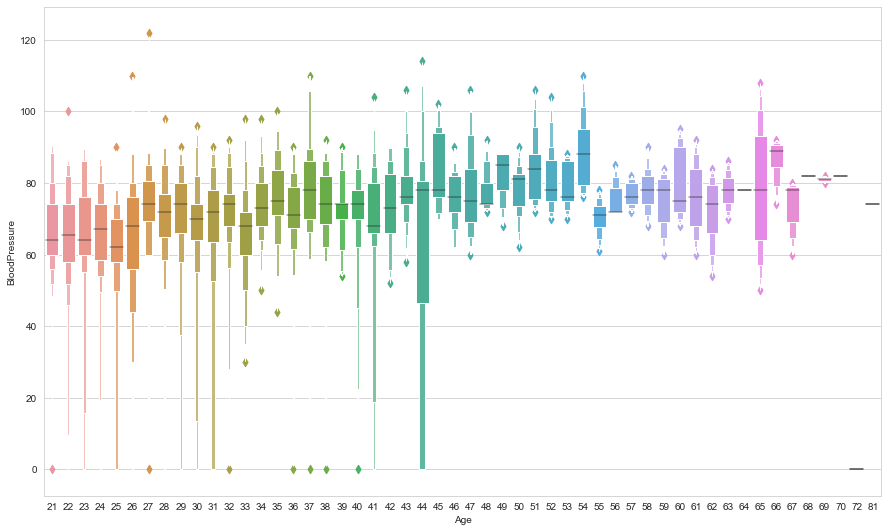

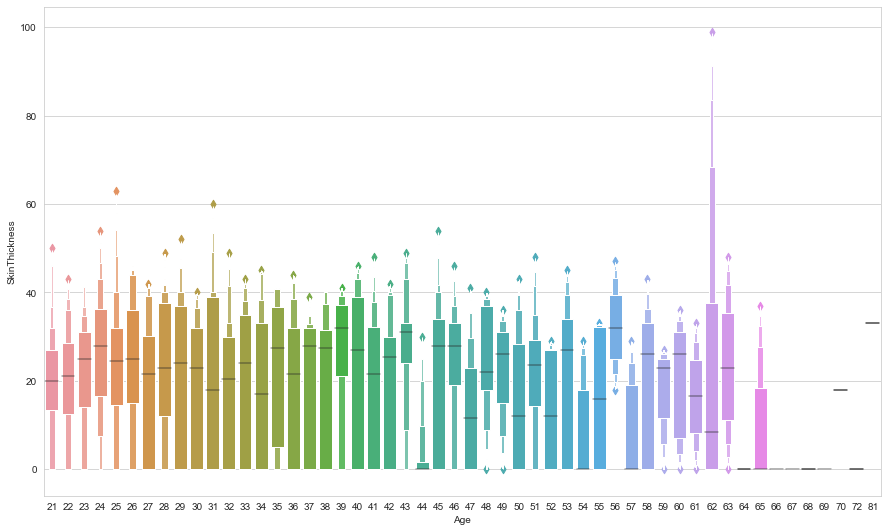

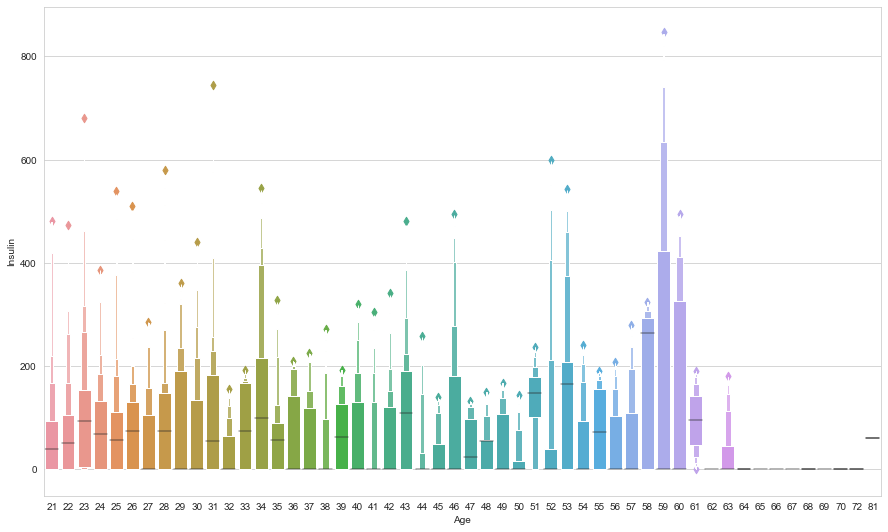

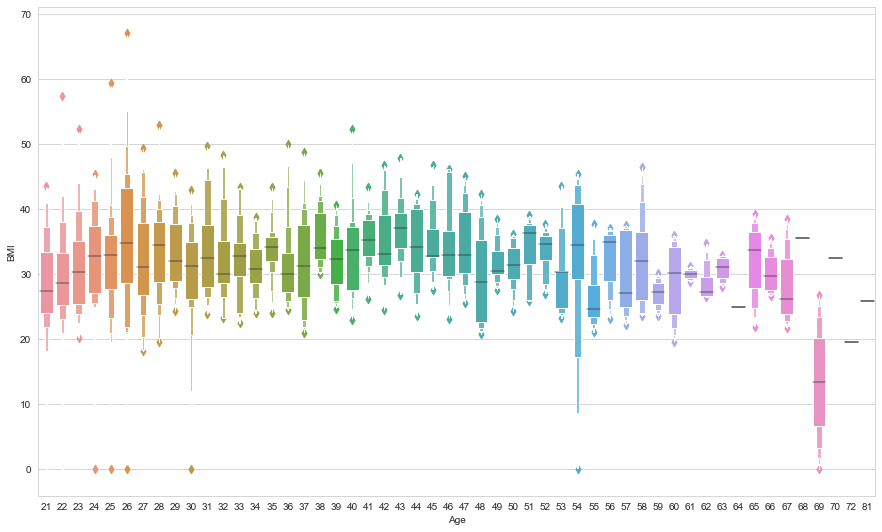

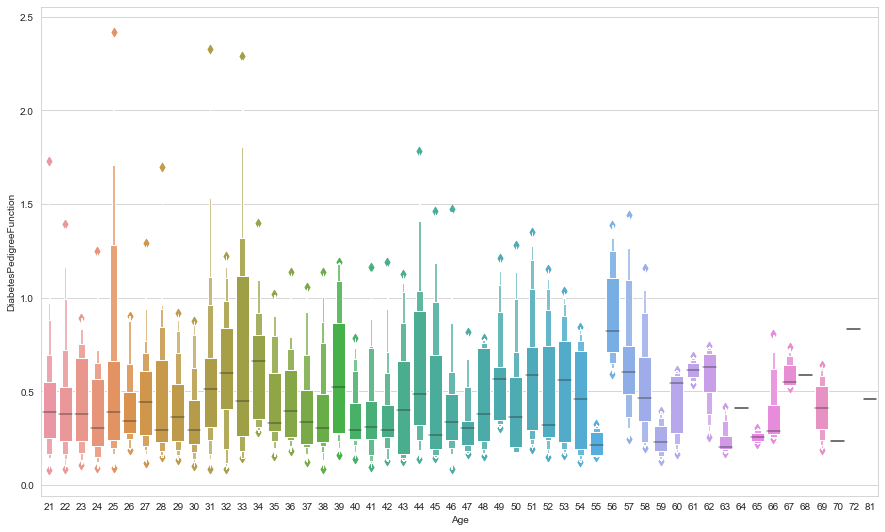

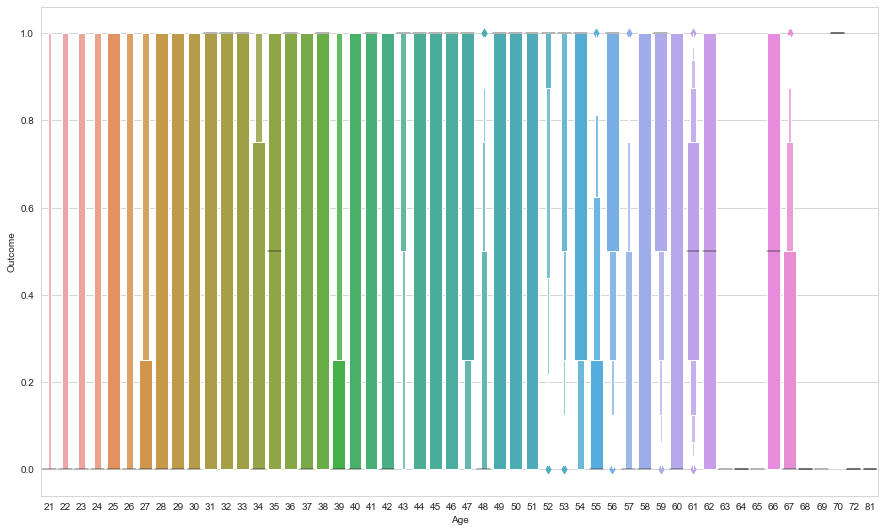

In [57]:
for i in ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Outcome']:
    plt.figure(figsize=(15,9))
    sns.boxenplot(x=df.Age,y=df[i],data=df,linewidth=1)
    plt.show()

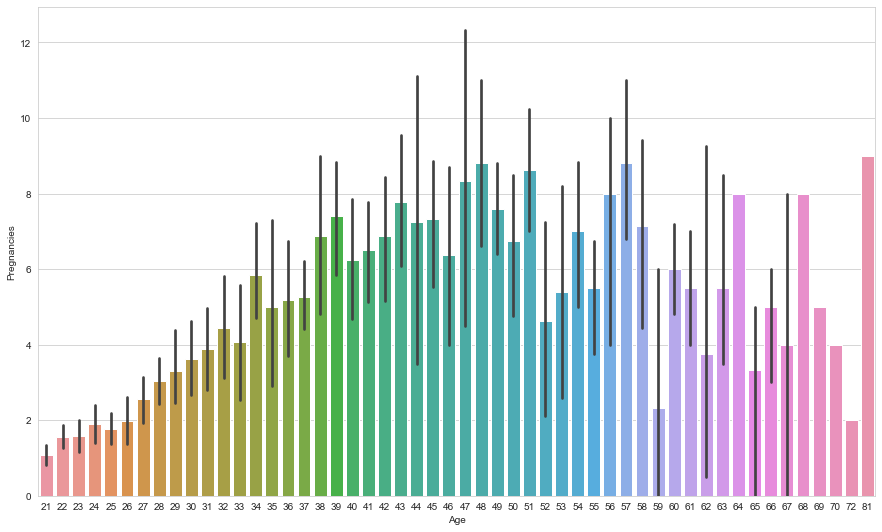

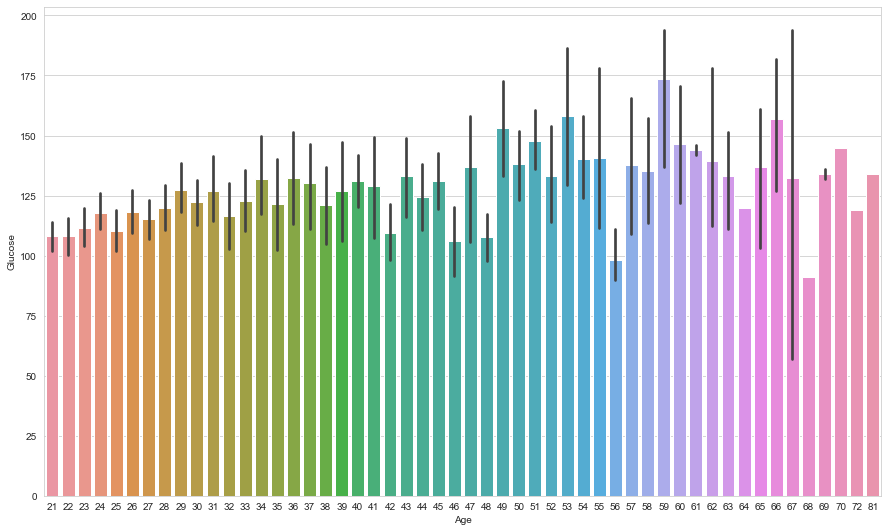

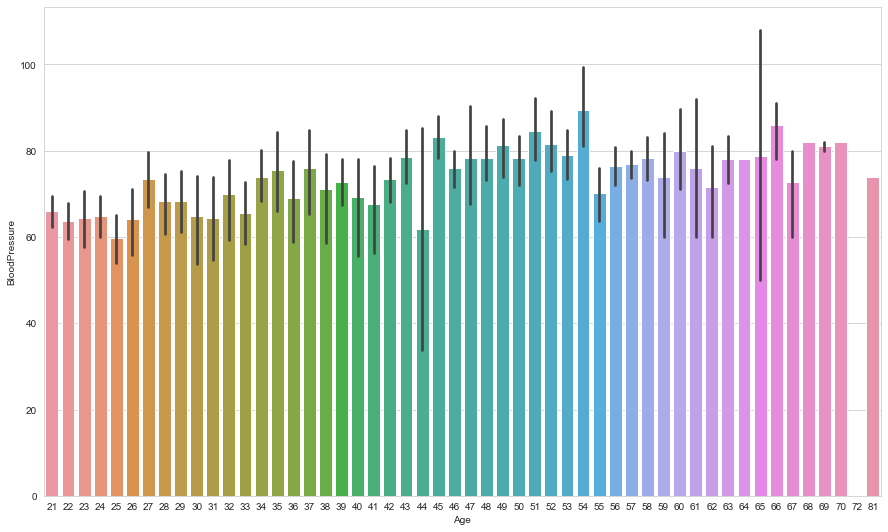

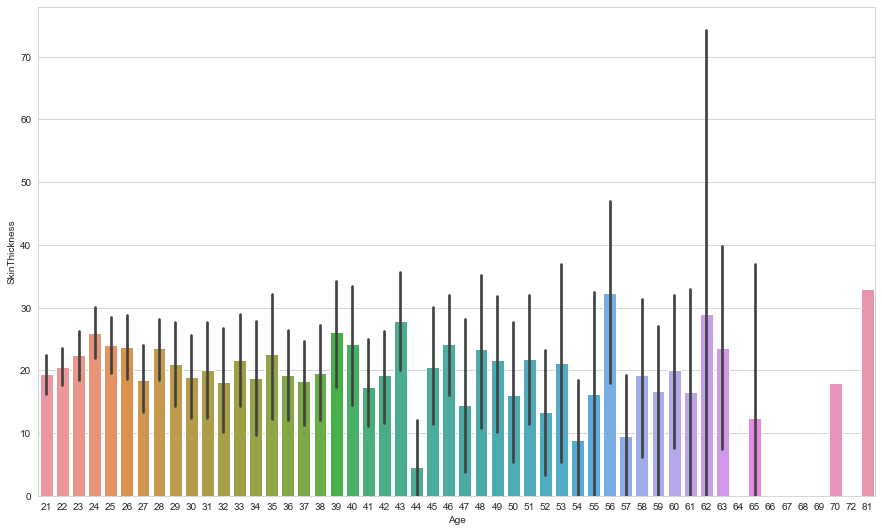

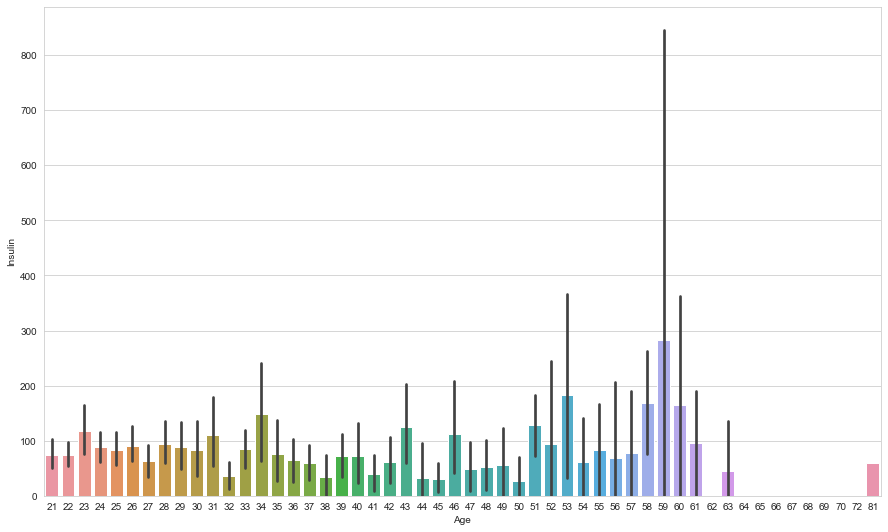

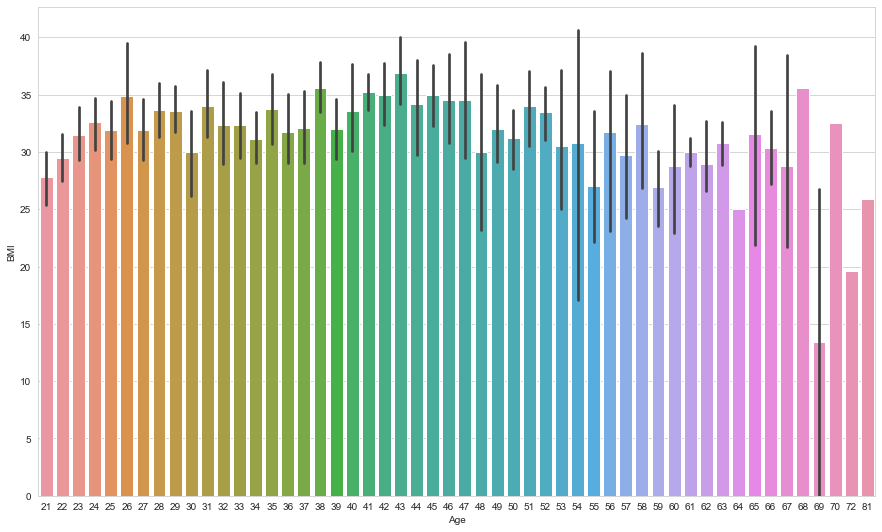

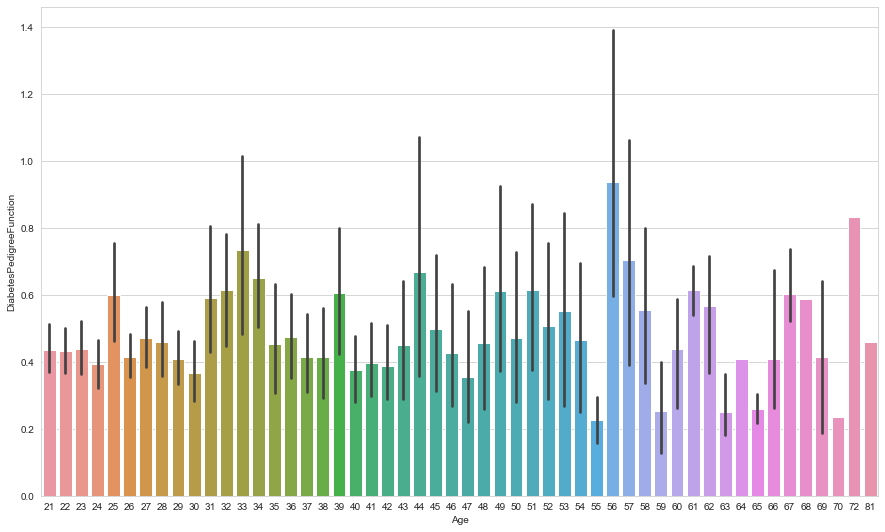

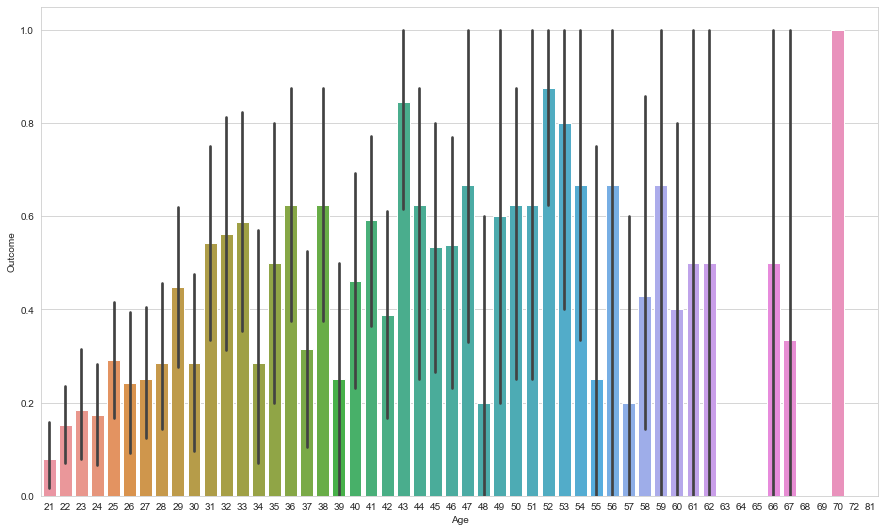

In [58]:
for i in ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Outcome']:
    plt.figure(figsize=(15,9))
    sns.barplot(x=df.Age,y=df[i],data=df,linewidth=1)
    plt.show()

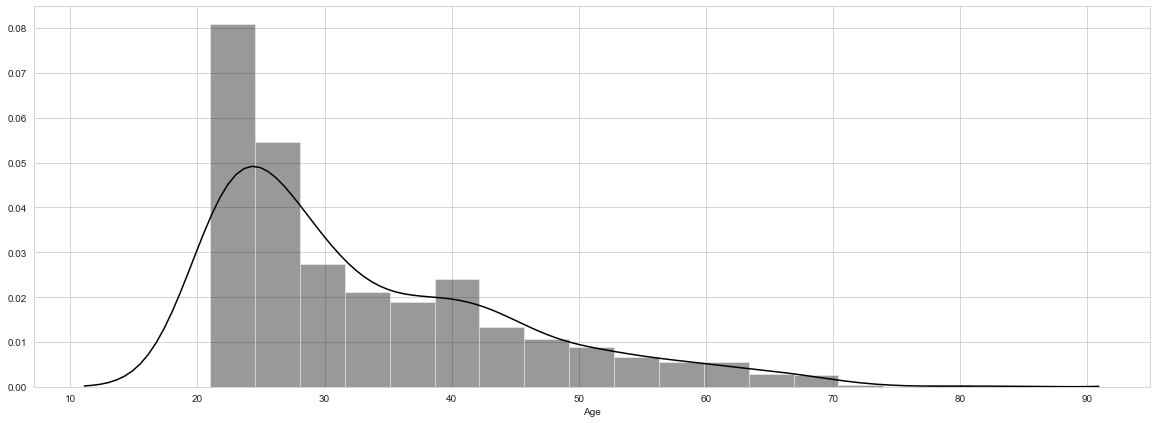

In [59]:
plt.figure(figsize=(20,7))
sns.distplot(df['Age'],color='black')

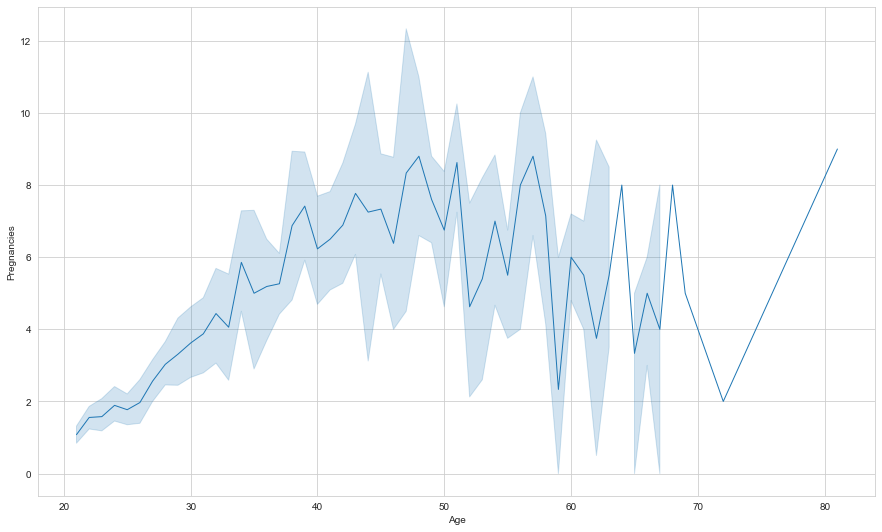

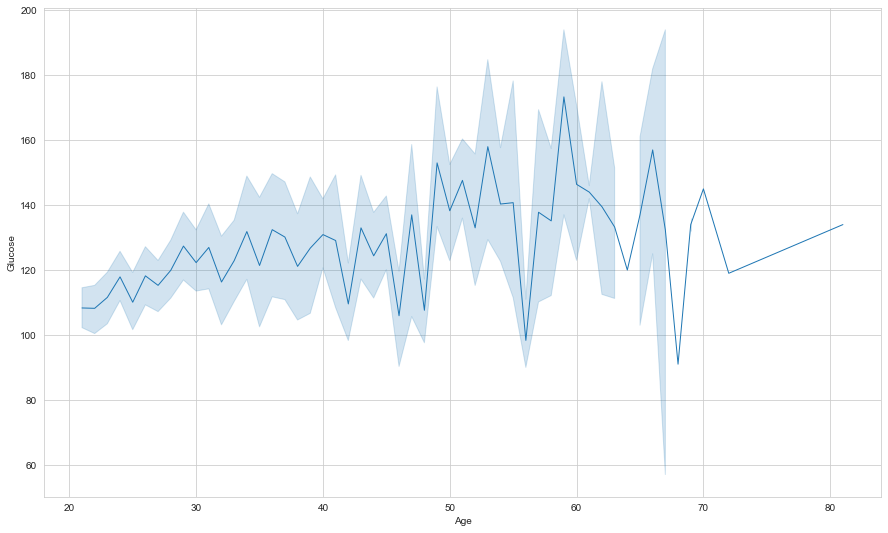

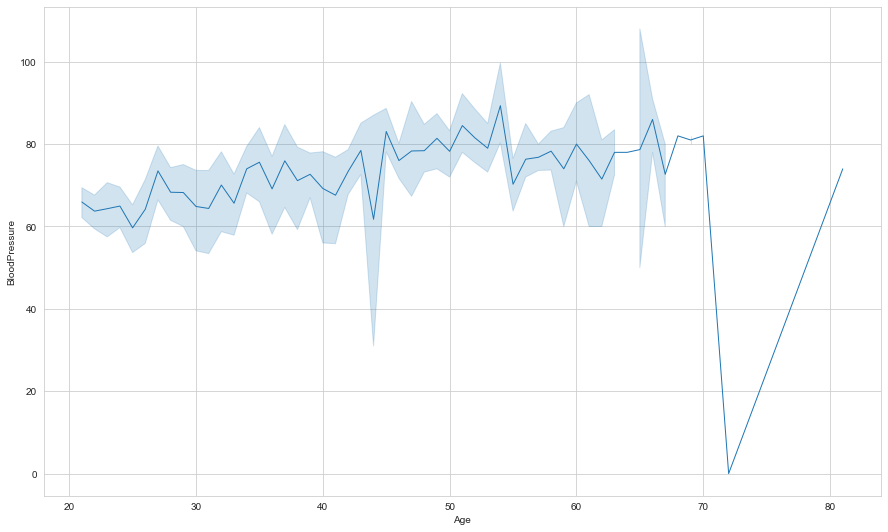

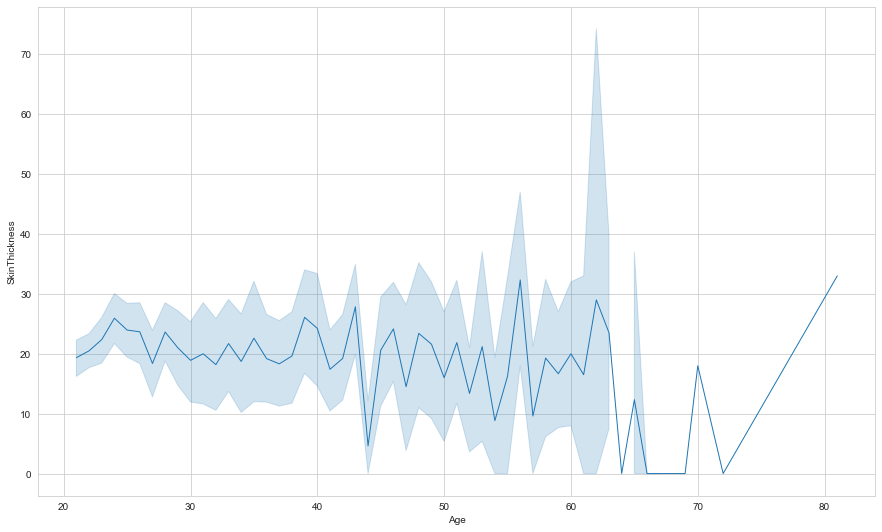

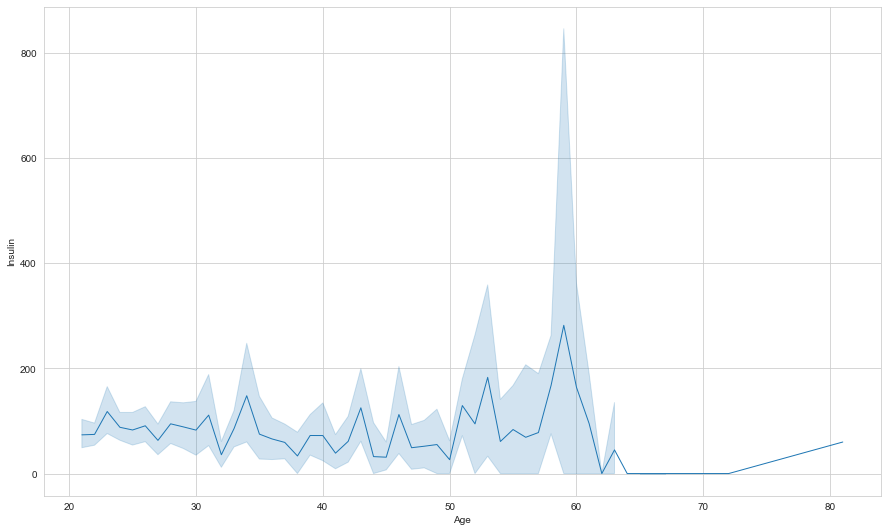

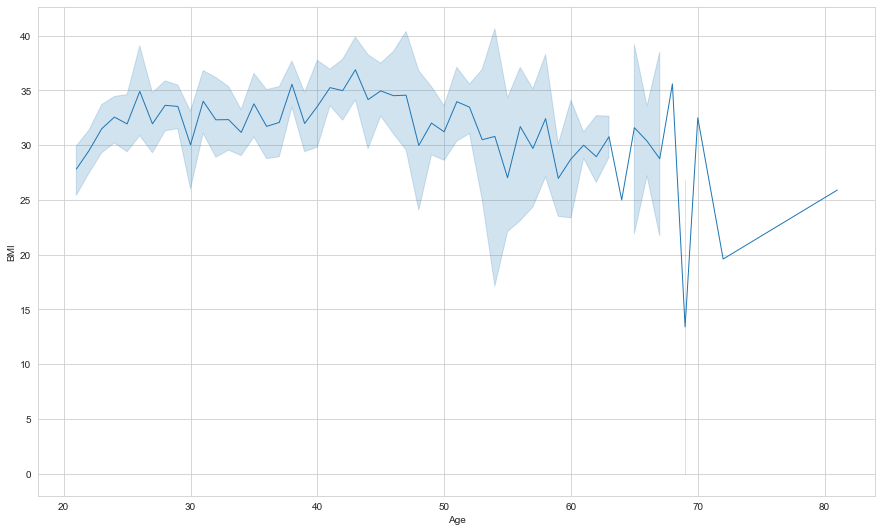

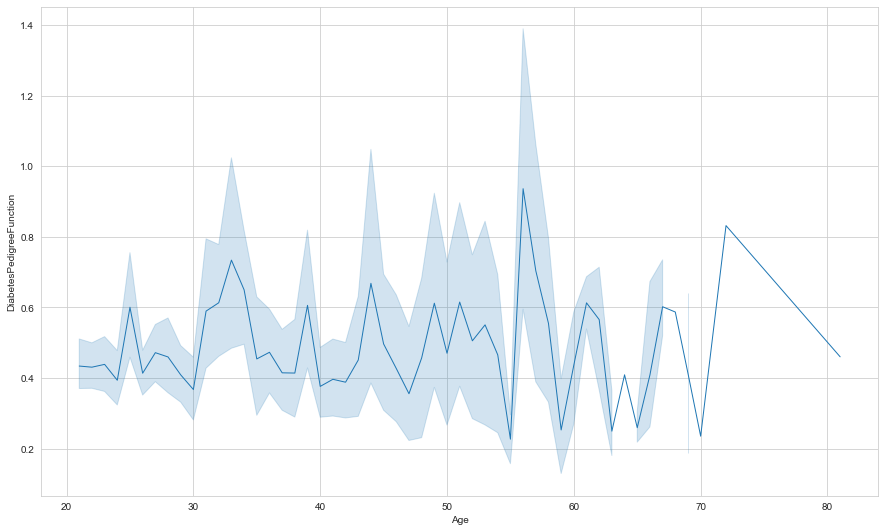

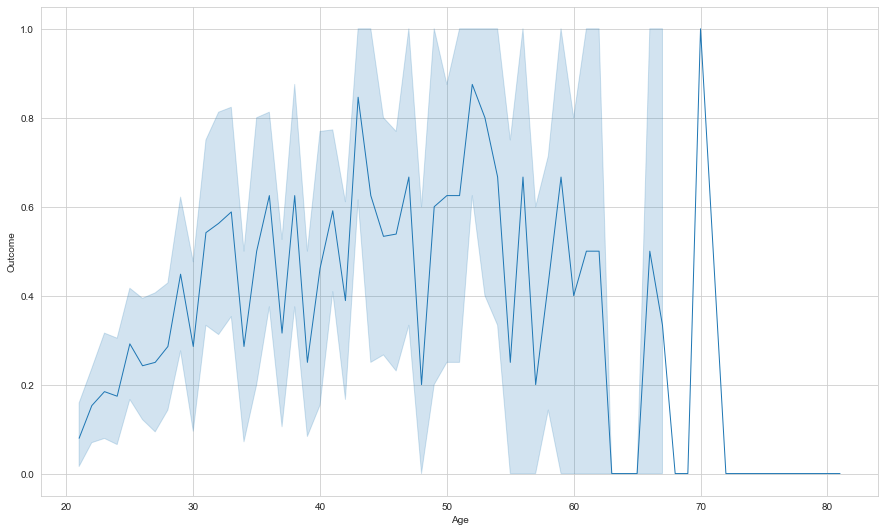

In [60]:
for i in ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Outcome']:
    plt.figure(figsize=(15,9))
    sns.lineplot(x=df.Age,y=df[i],data=df,linewidth=1)
    plt.show()

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\categorical.py:2619: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


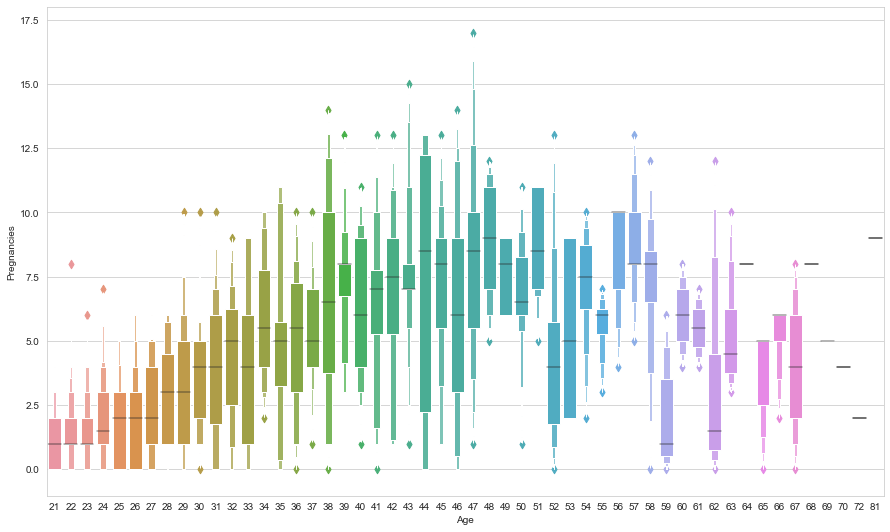

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\categorical.py:2619: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


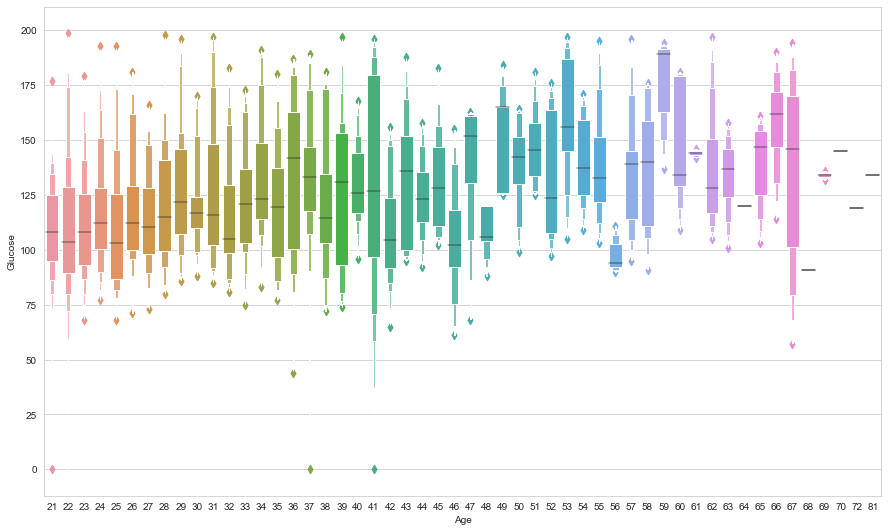

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\categorical.py:2619: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


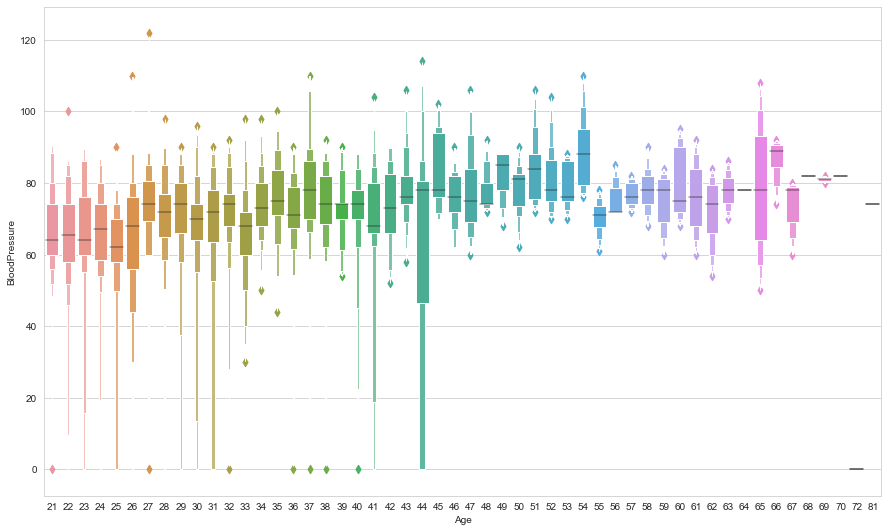

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\categorical.py:2619: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


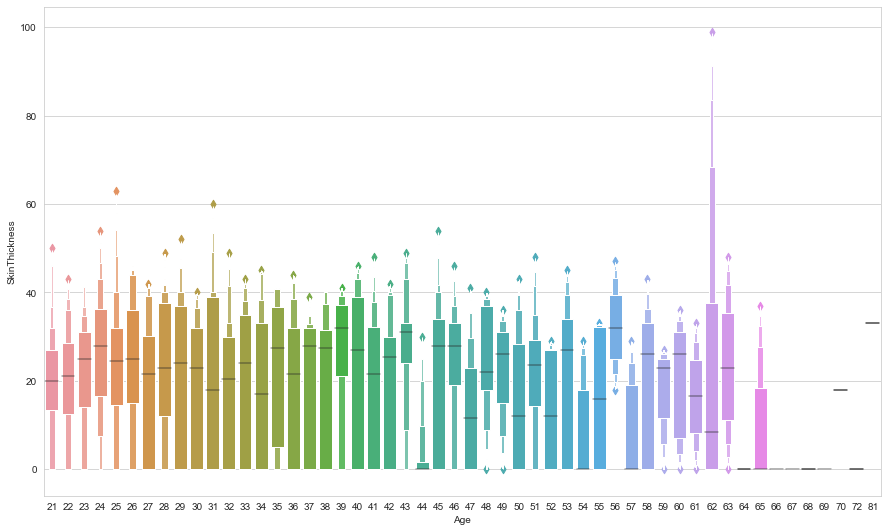

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\categorical.py:2619: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


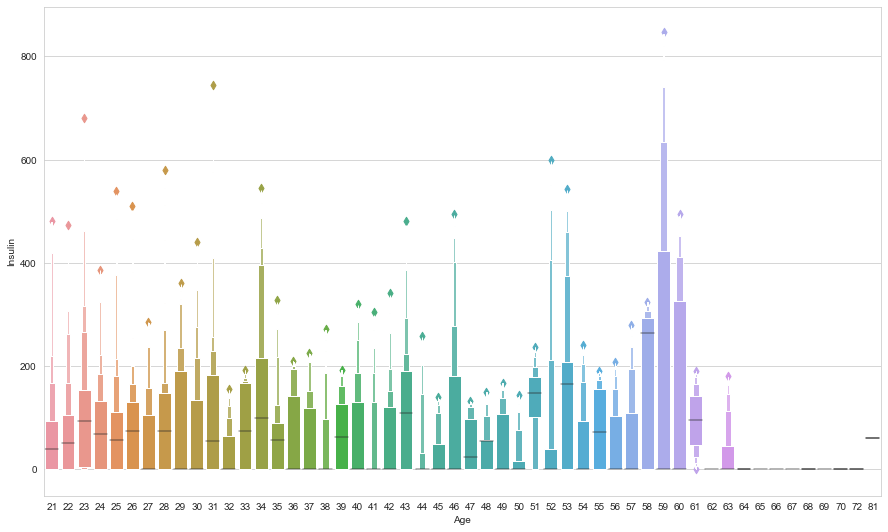

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\categorical.py:2619: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


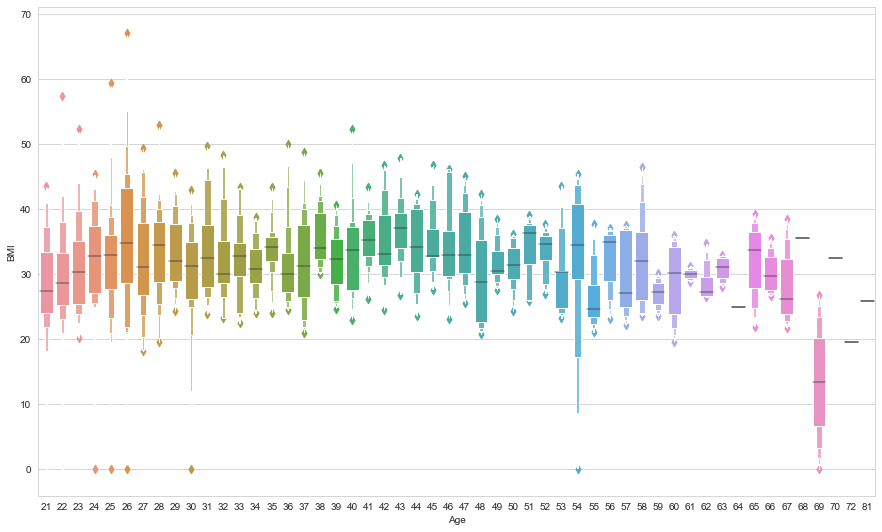

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\categorical.py:2619: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


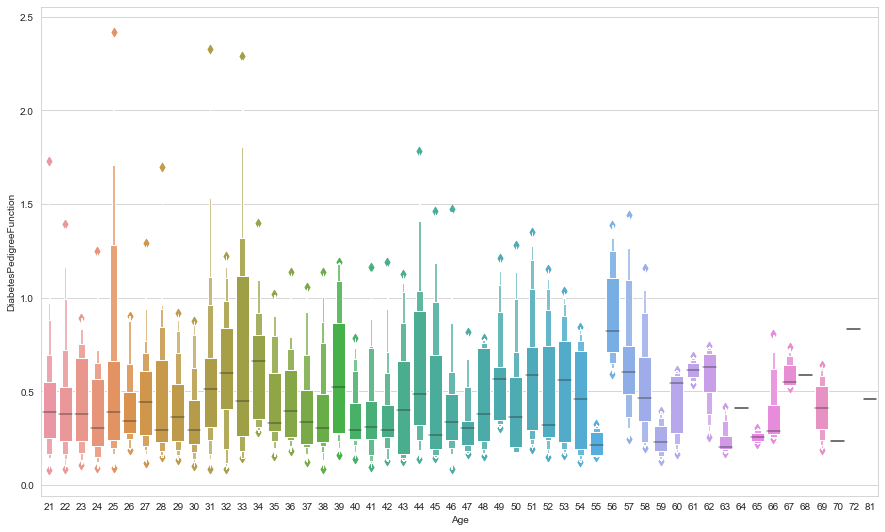

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\categorical.py:2619: UserWarning: The `lvplot` function has been renamed to `boxenplot`. The original name will be removed in a future release. Please update your code. 
  warnings.warn(msg)


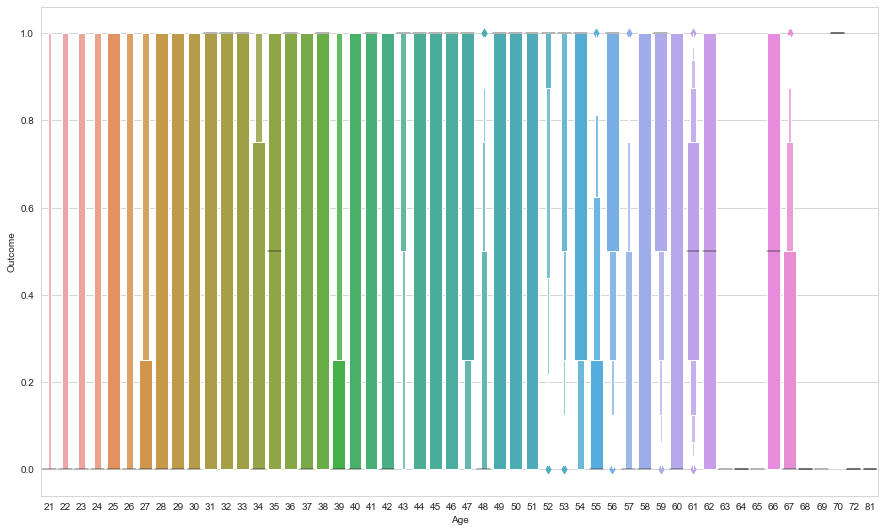

In [61]:
for i in ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Outcome']:
    plt.figure(figsize=(15,9))
    sns.lvplot(x=df.Age,y=df[i],data=df,linewidth=1)
    plt.show()

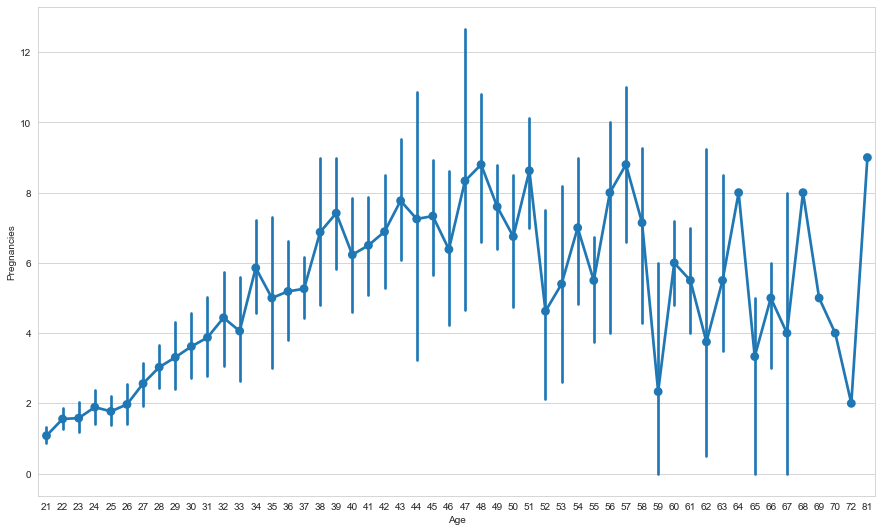

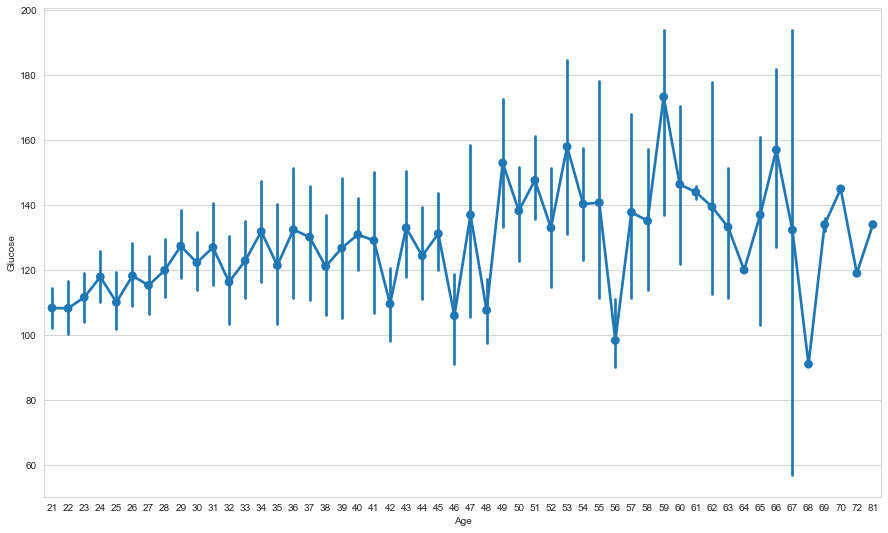

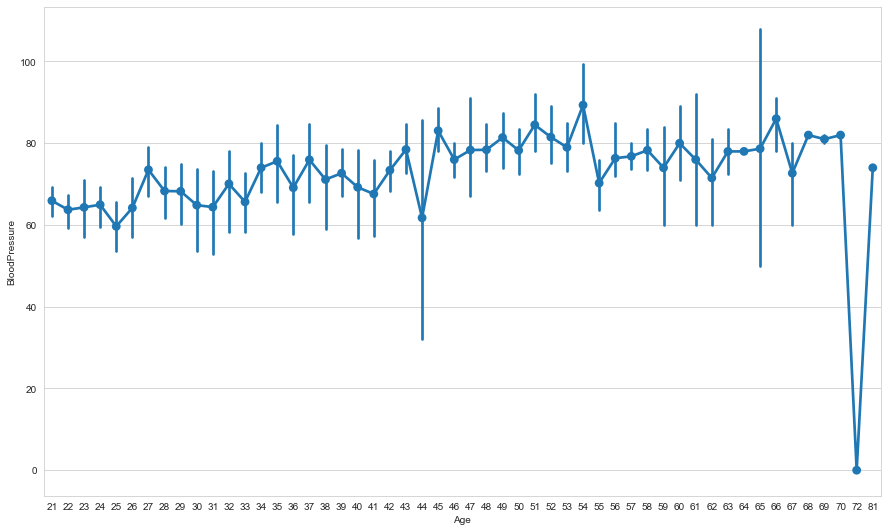

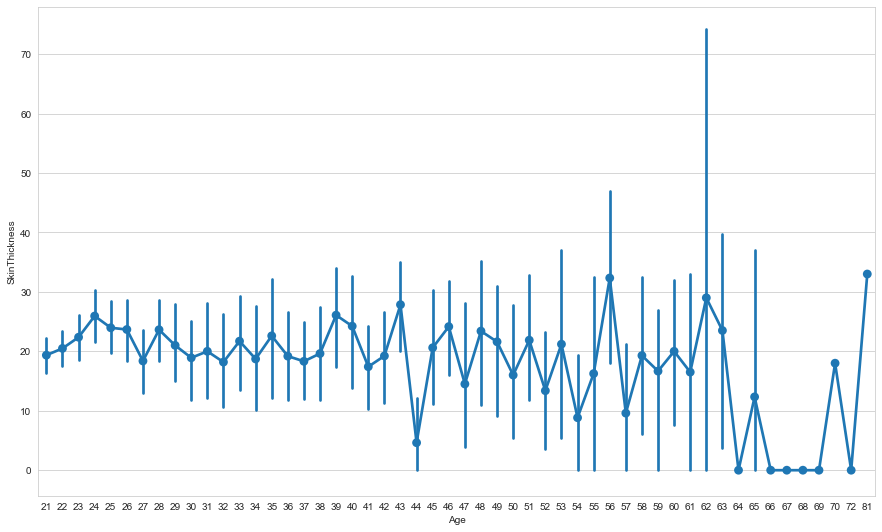

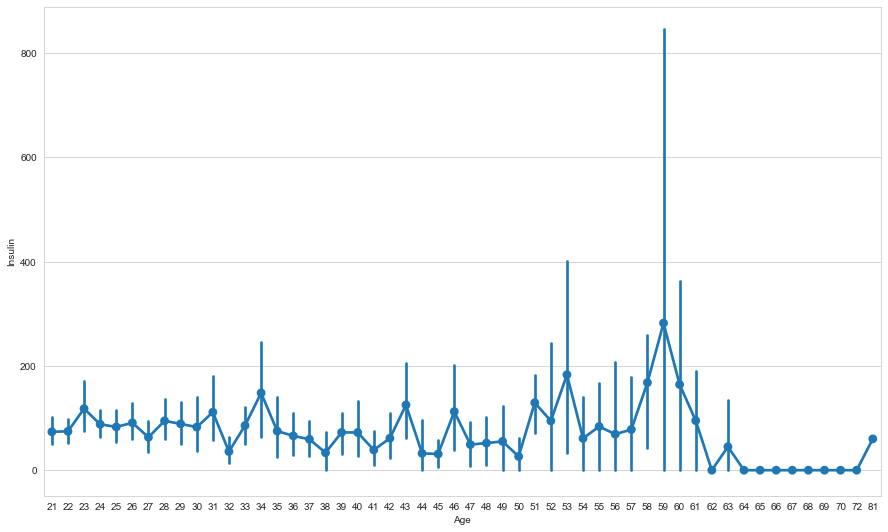

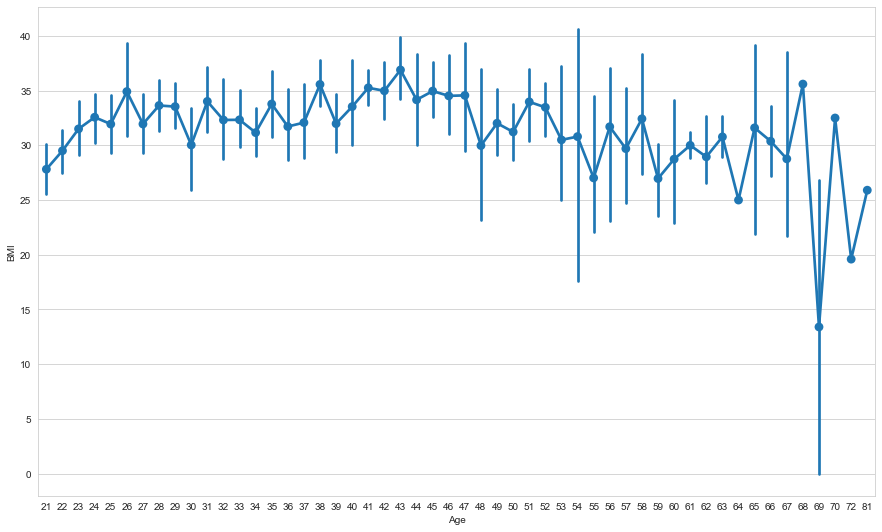

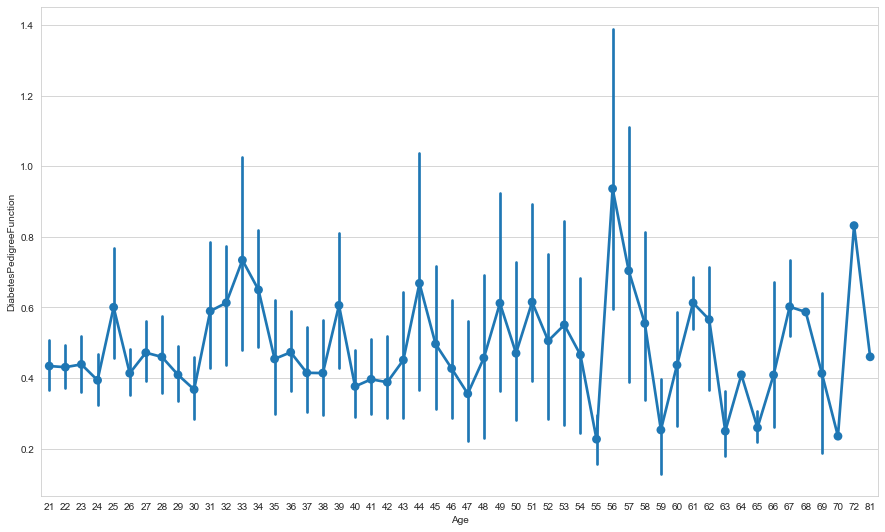

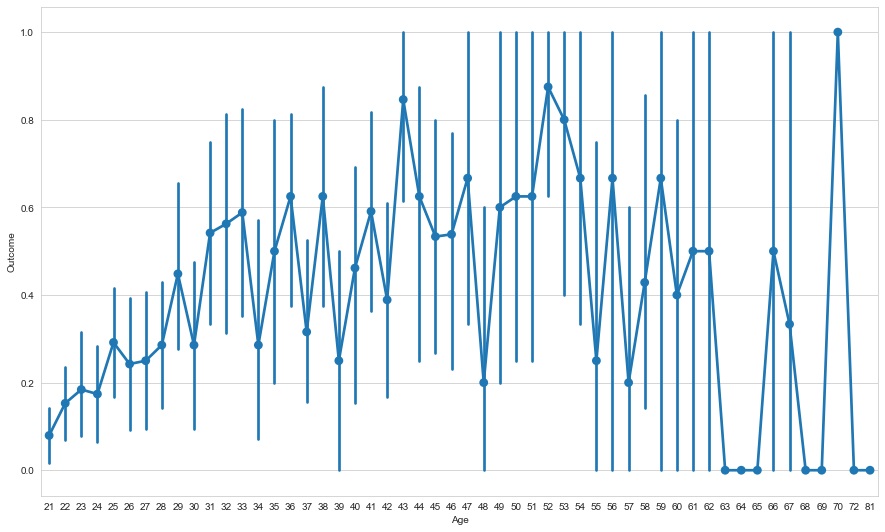

In [62]:
for i in ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Outcome']:
    plt.figure(figsize=(15,9))
    sns.pointplot(x=df.Age,y=df[i],data=df,linewidth=1)
    plt.show()

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\distributions.py:437: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


<Figure size 1080x648 with 0 Axes>

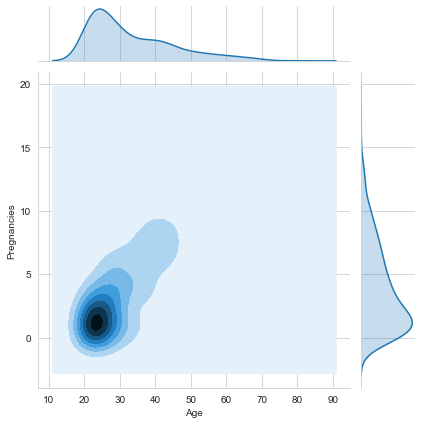

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\distributions.py:437: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


<Figure size 1080x648 with 0 Axes>

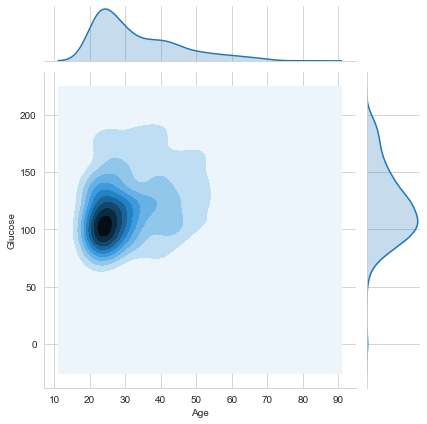

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\distributions.py:437: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


<Figure size 1080x648 with 0 Axes>

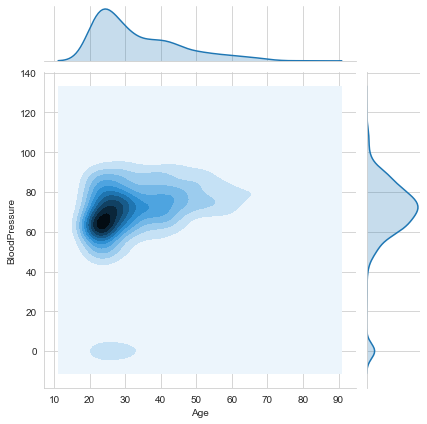

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\distributions.py:437: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


<Figure size 1080x648 with 0 Axes>

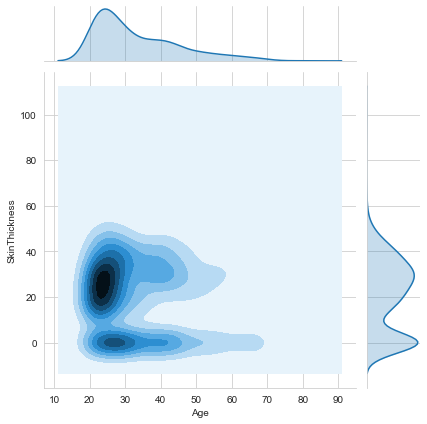

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\distributions.py:437: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


<Figure size 1080x648 with 0 Axes>

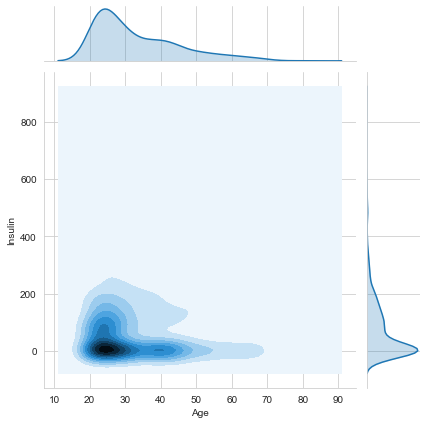

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\distributions.py:437: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


<Figure size 1080x648 with 0 Axes>

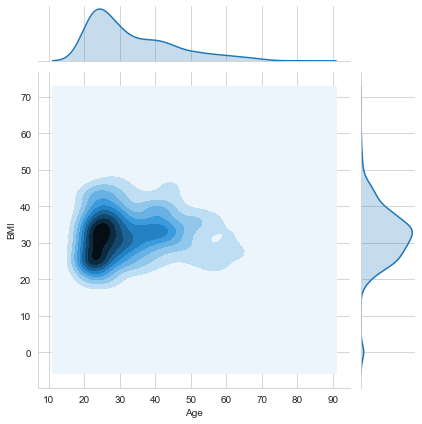

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\distributions.py:437: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


<Figure size 1080x648 with 0 Axes>

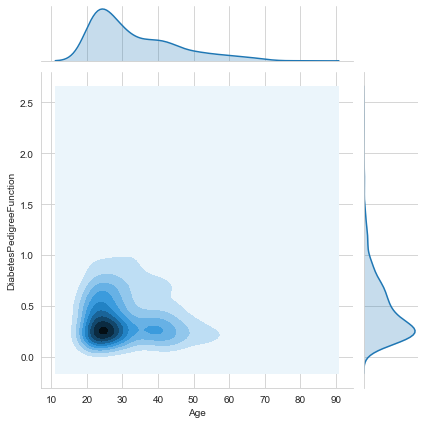

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\seaborn\distributions.py:437: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


<Figure size 1080x648 with 0 Axes>

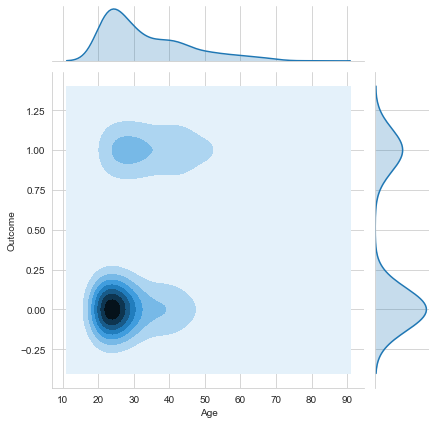

In [63]:
for i in ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Outcome']:
    plt.figure(figsize=(15,9))
    sns.jointplot(x=df.Age,y=df[i],kind='kde',data=df,linewidth=1)
    plt.show()

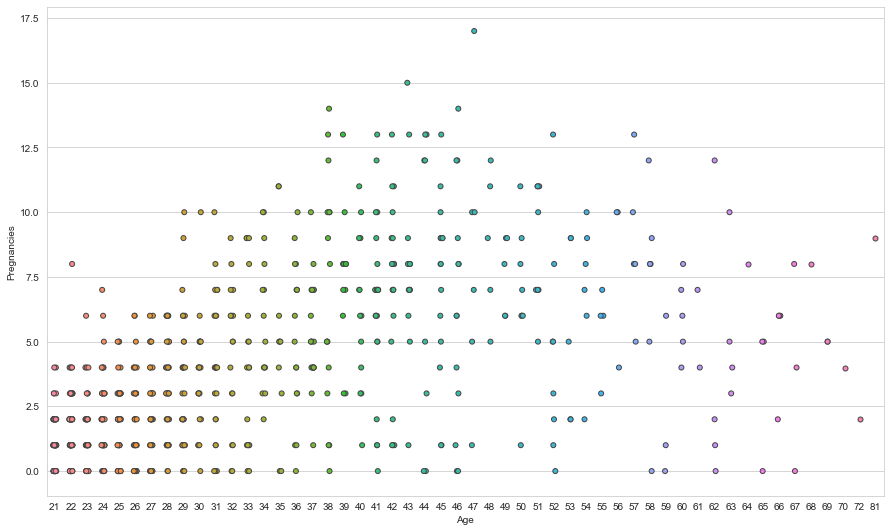

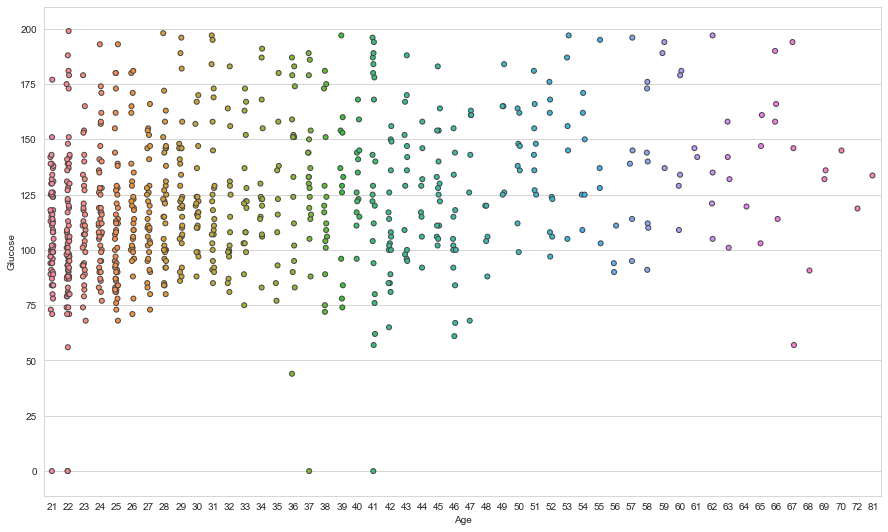

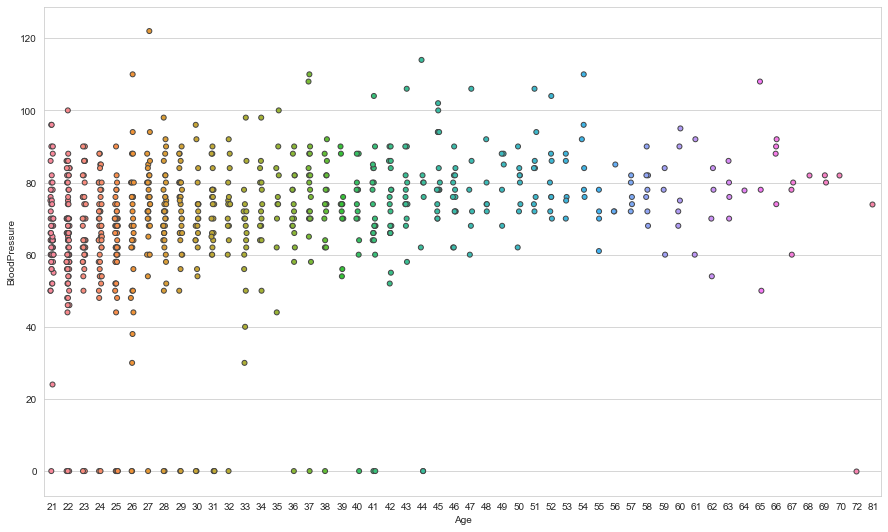

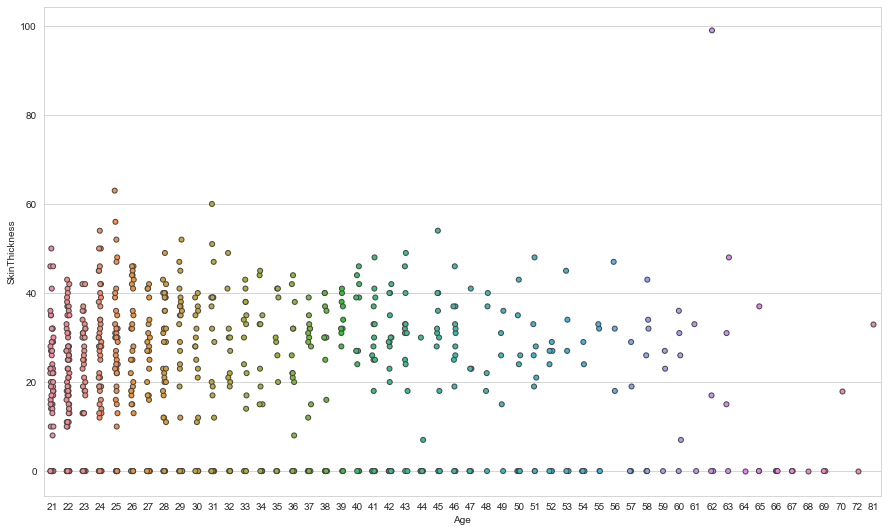

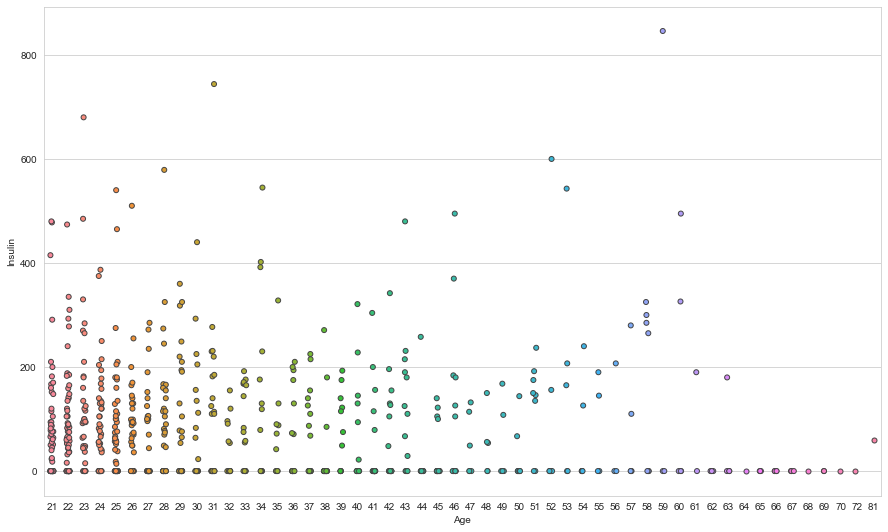

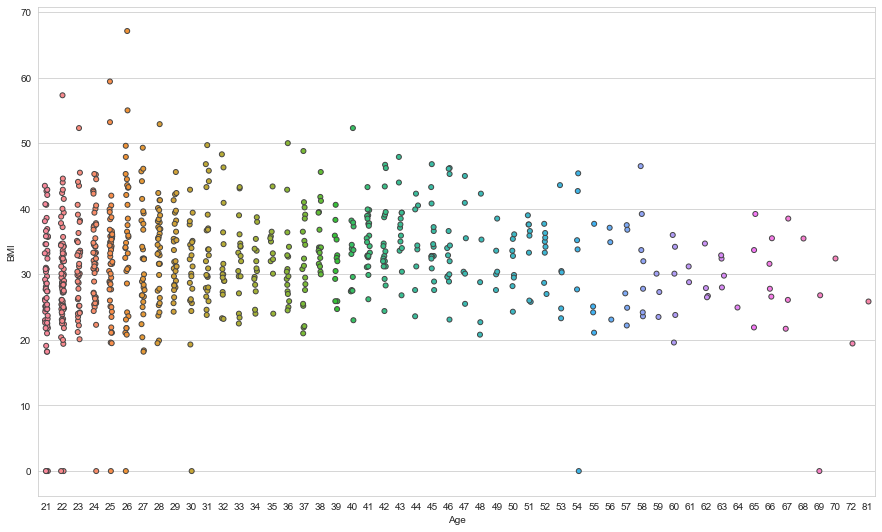

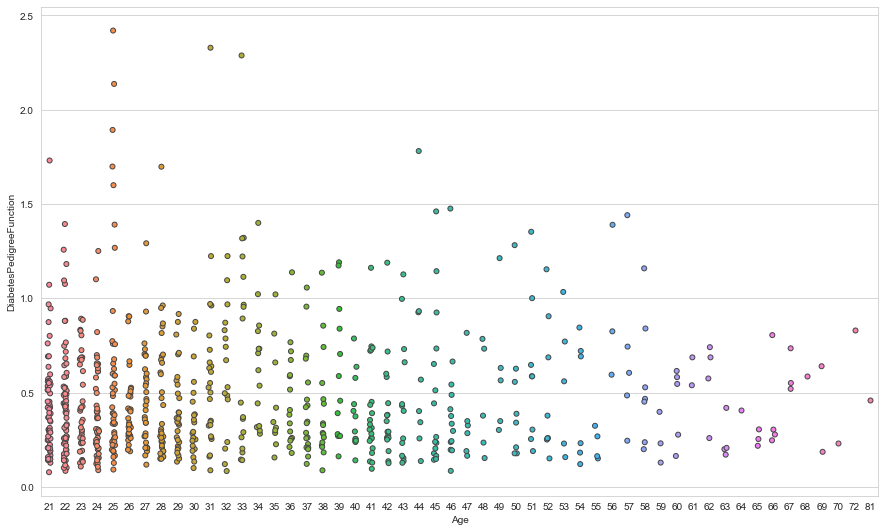

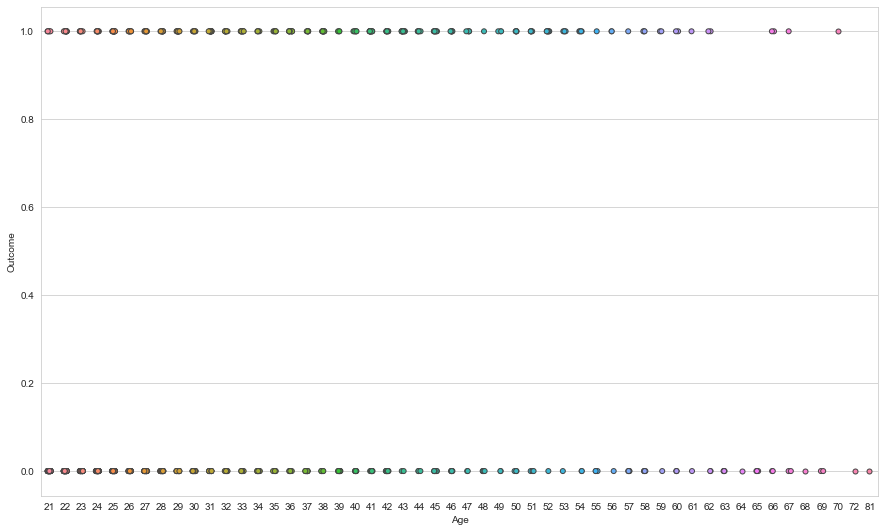

In [64]:
for i in ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Outcome']:
    plt.figure(figsize=(15,9))
    sns.stripplot(x=df.Age,y=df[i],data=df,linewidth=1)
    plt.show()

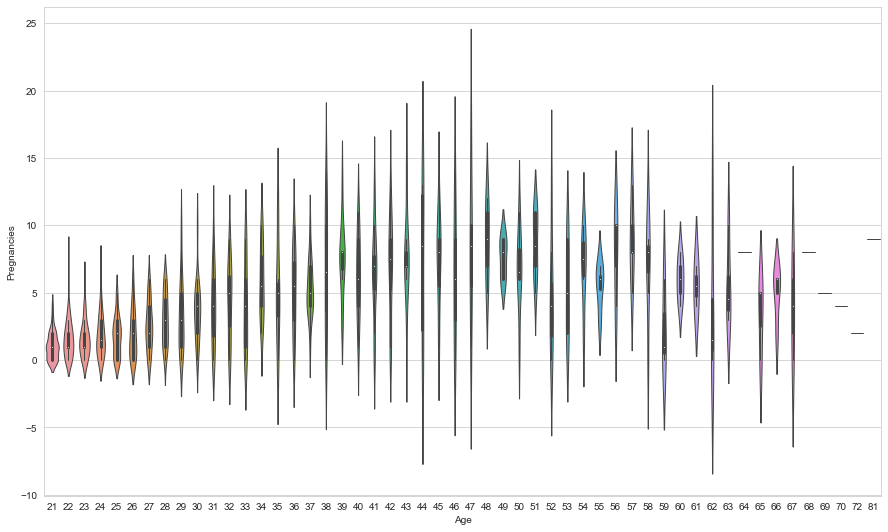

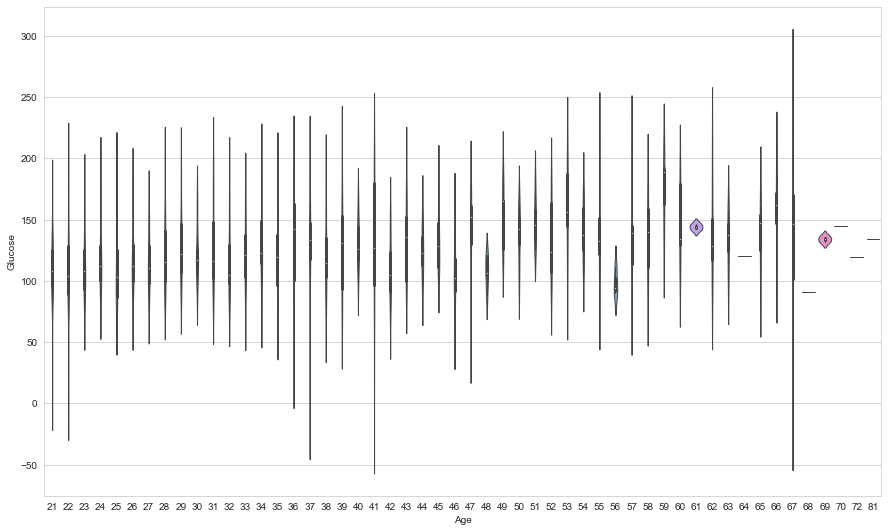

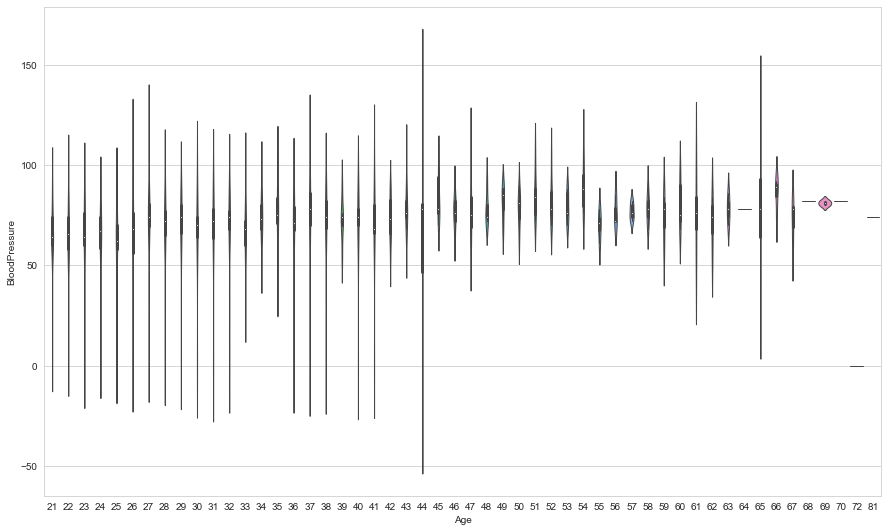

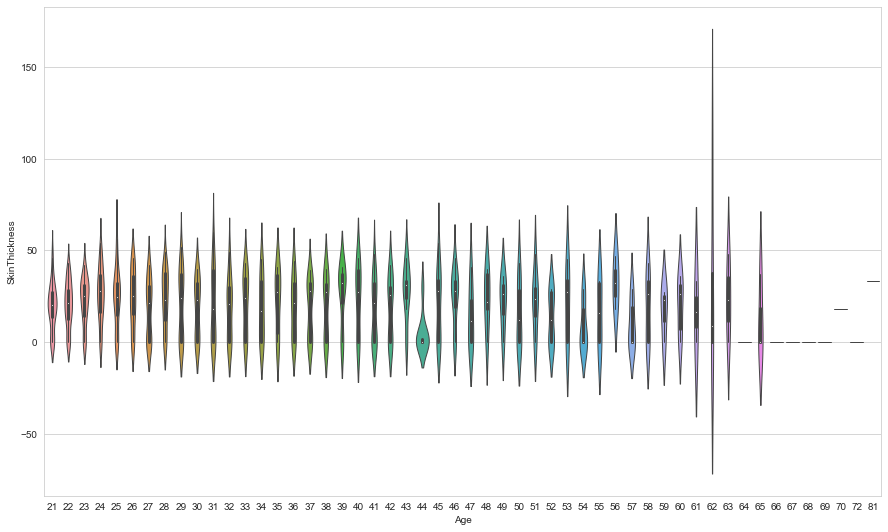

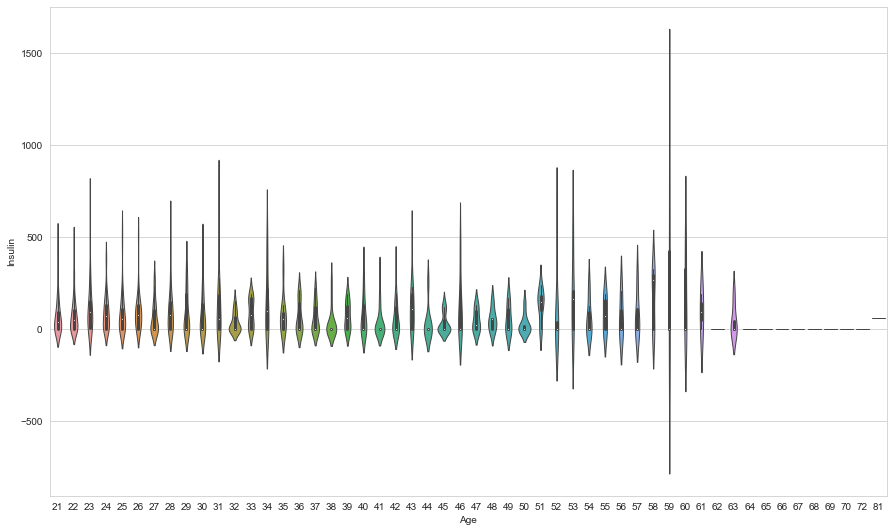

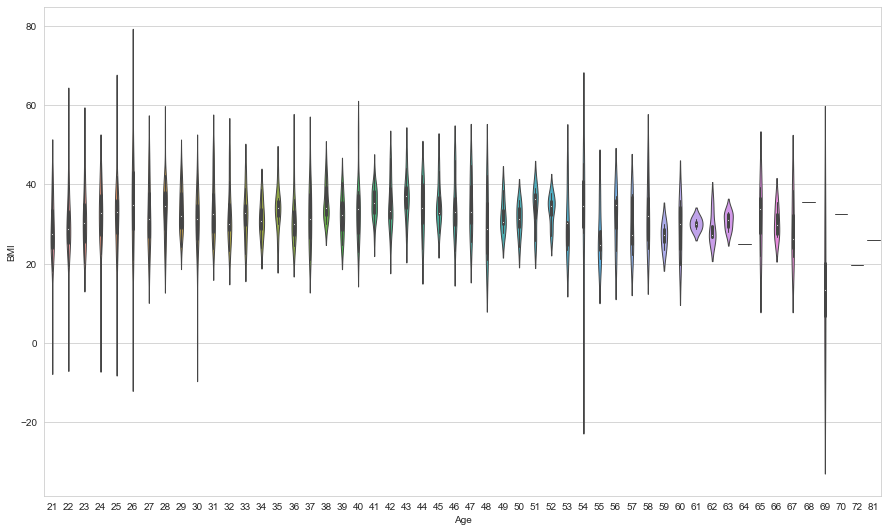

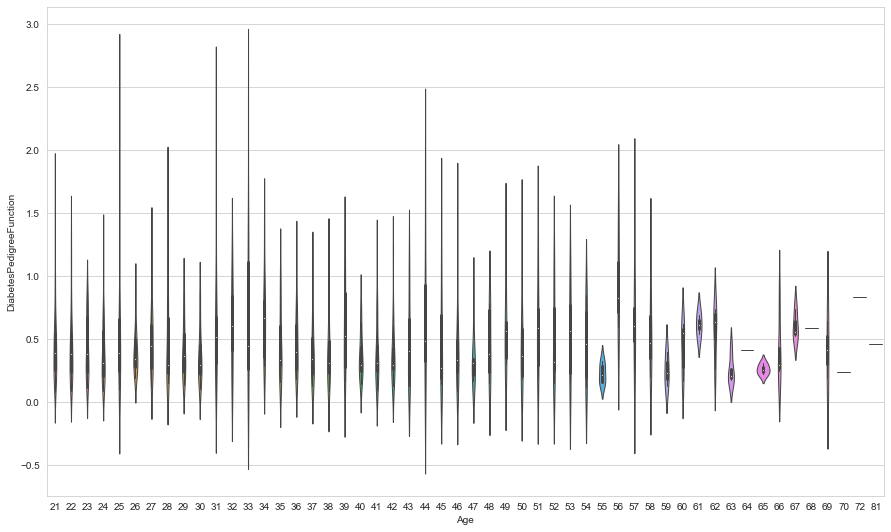

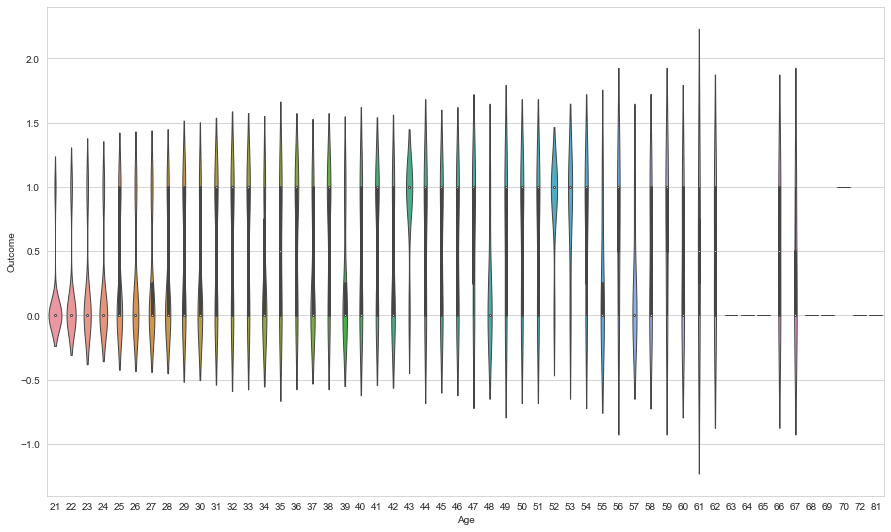

In [65]:
for i in ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Outcome']:
    plt.figure(figsize=(15,9))
    sns.violinplot(x=df.Age,y=df[i],data=df,linewidth=1)
    plt.show()

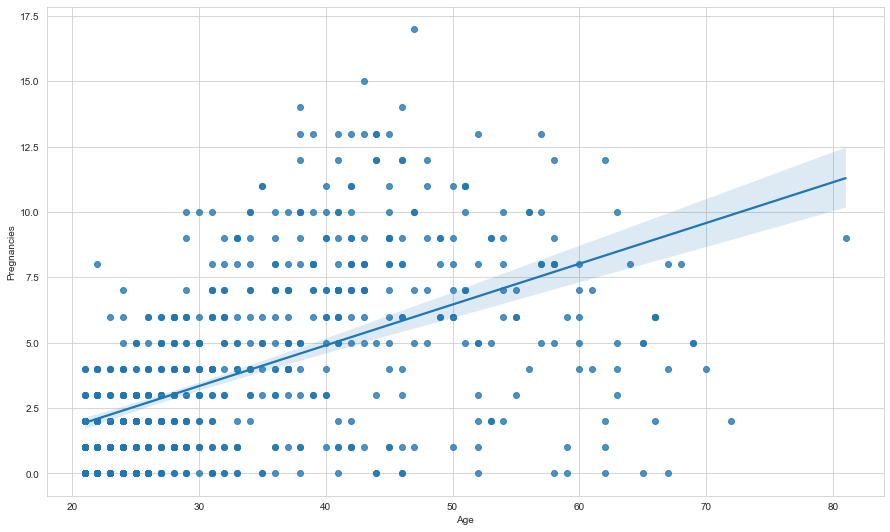

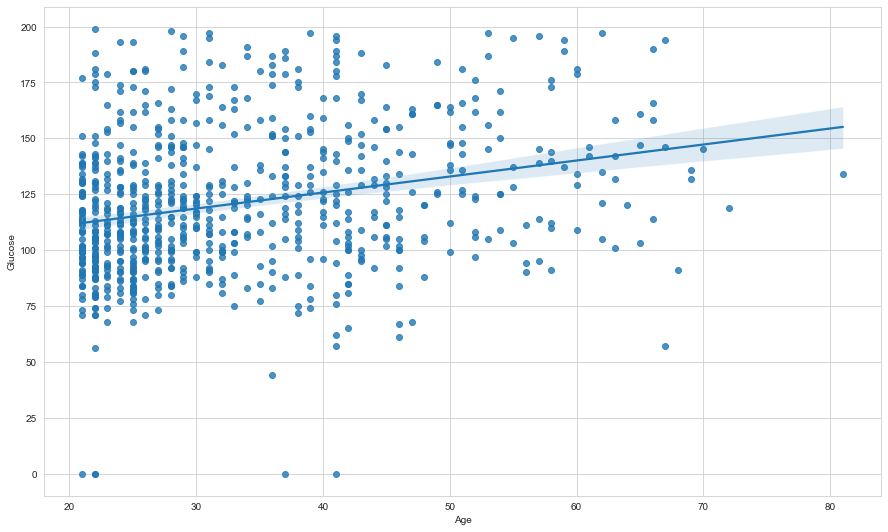

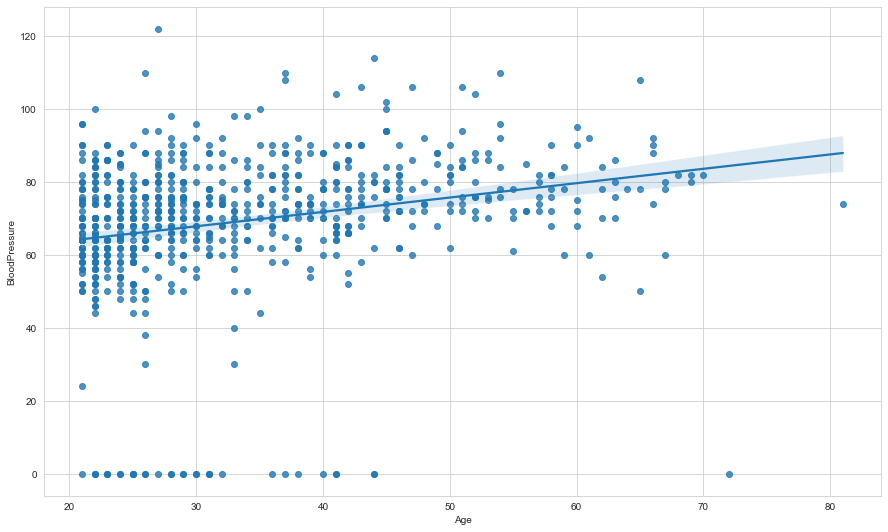

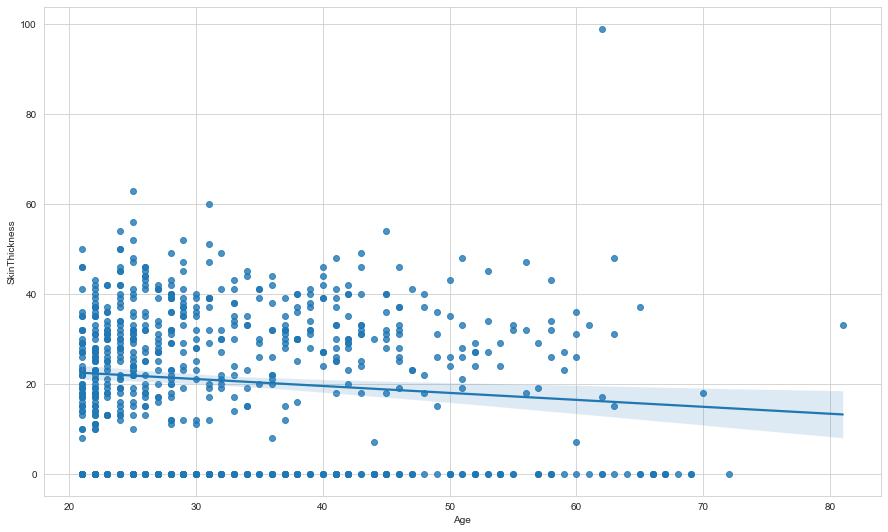

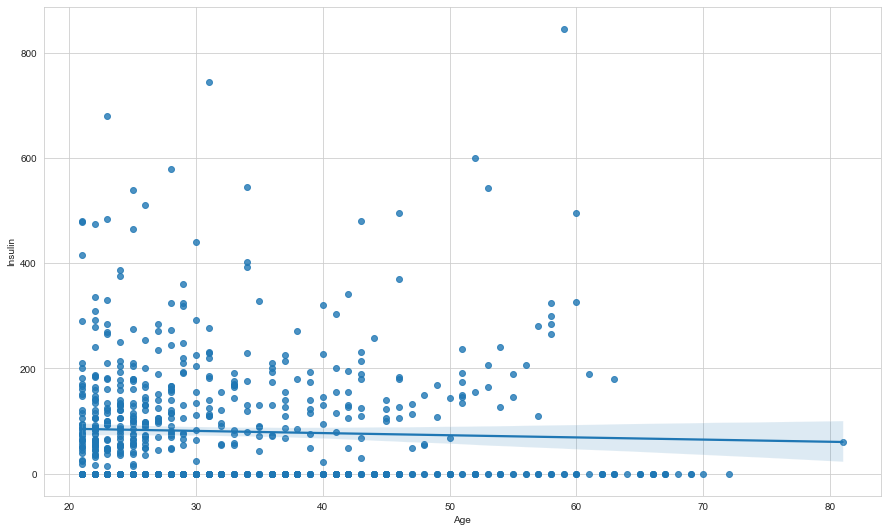

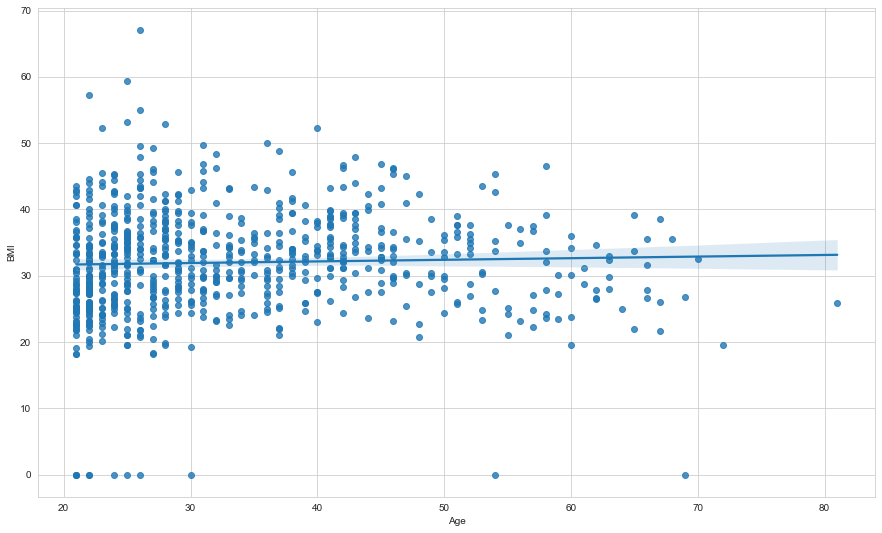

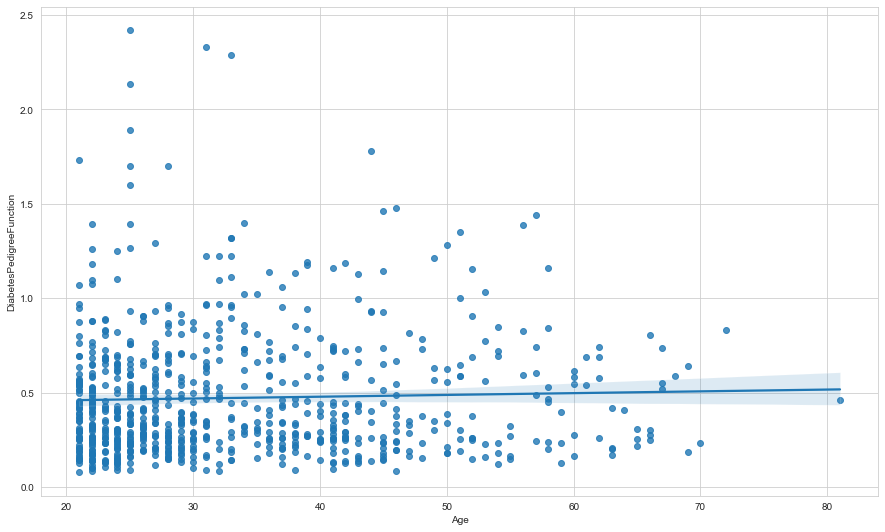

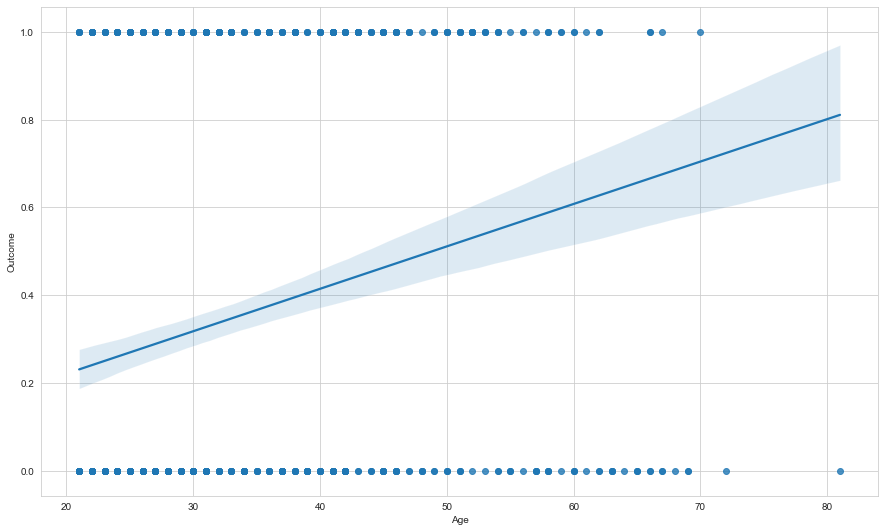

In [67]:
for i in ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Outcome']:
    plt.figure(figsize=(15,9))
    sns.regplot(x=df.Age,y=df[i],data=df)
    plt.show()

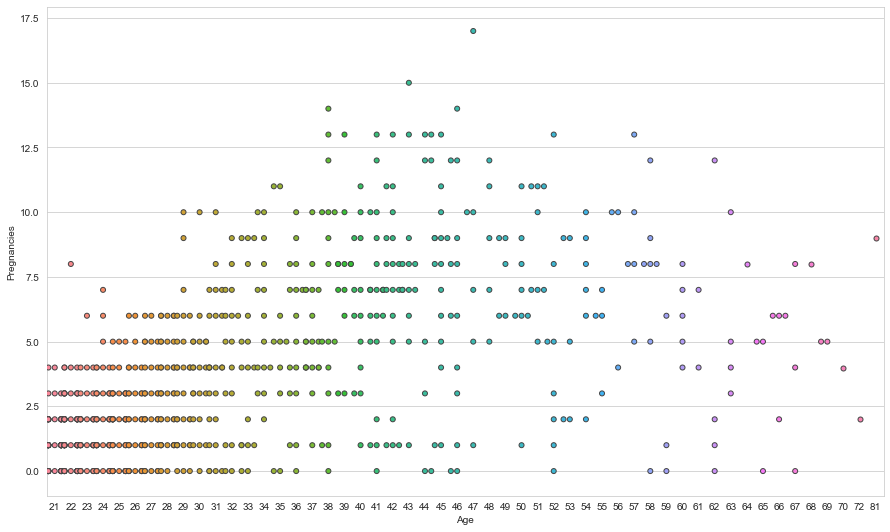

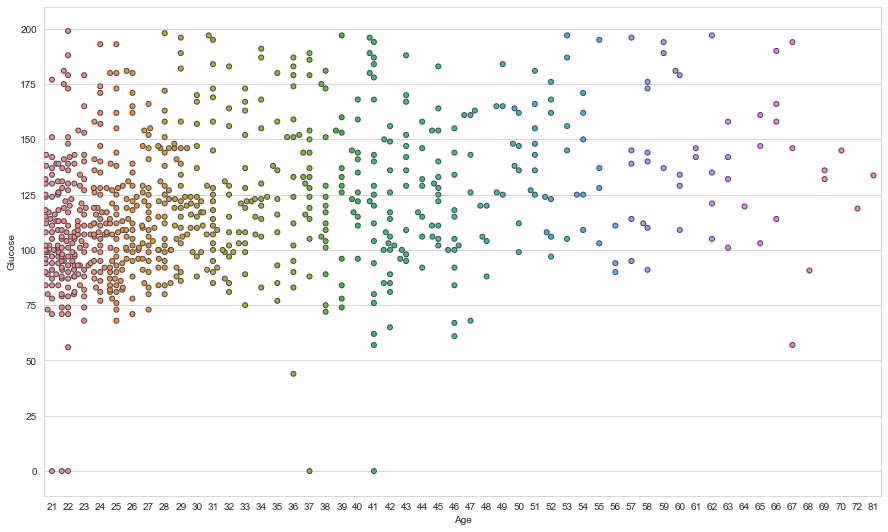

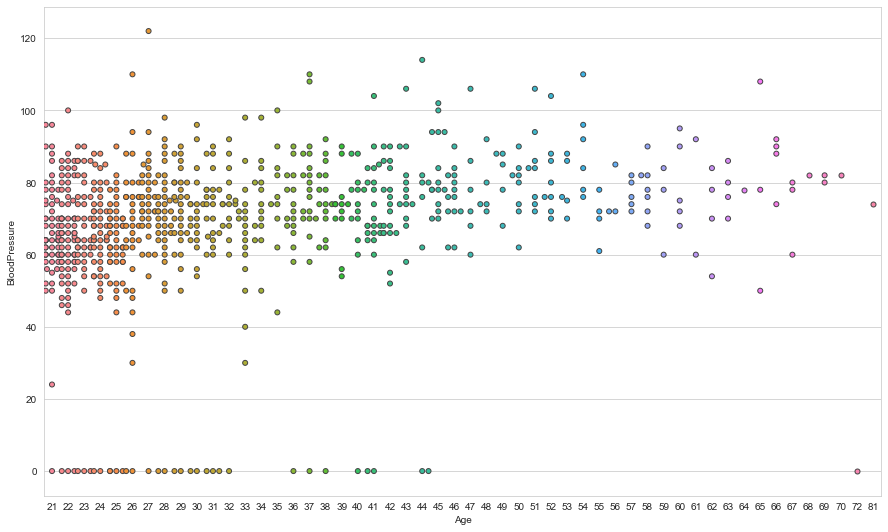

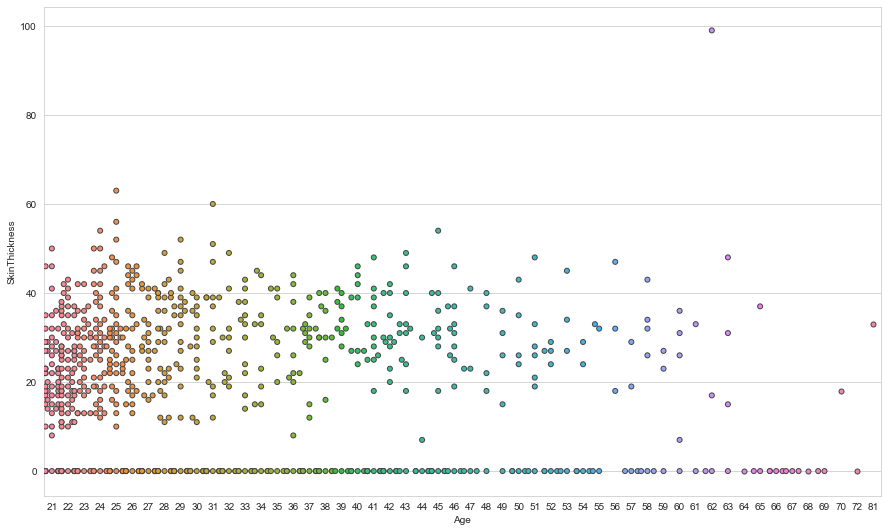

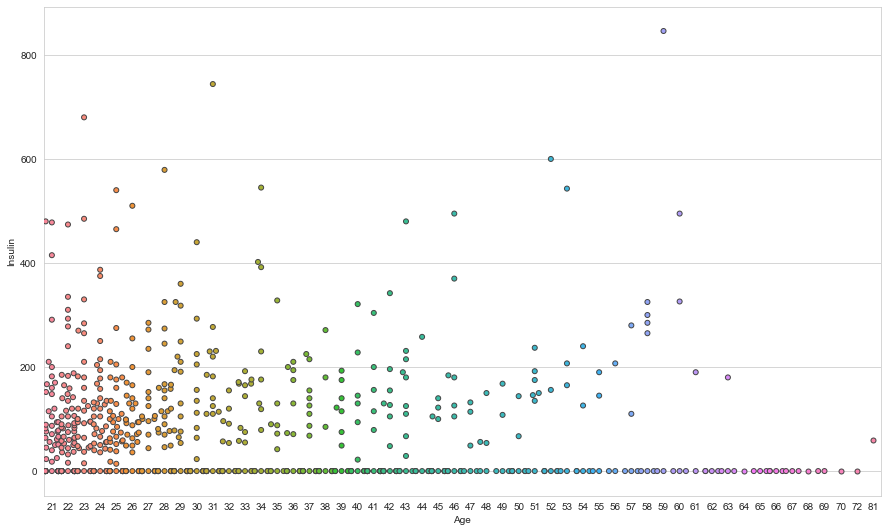

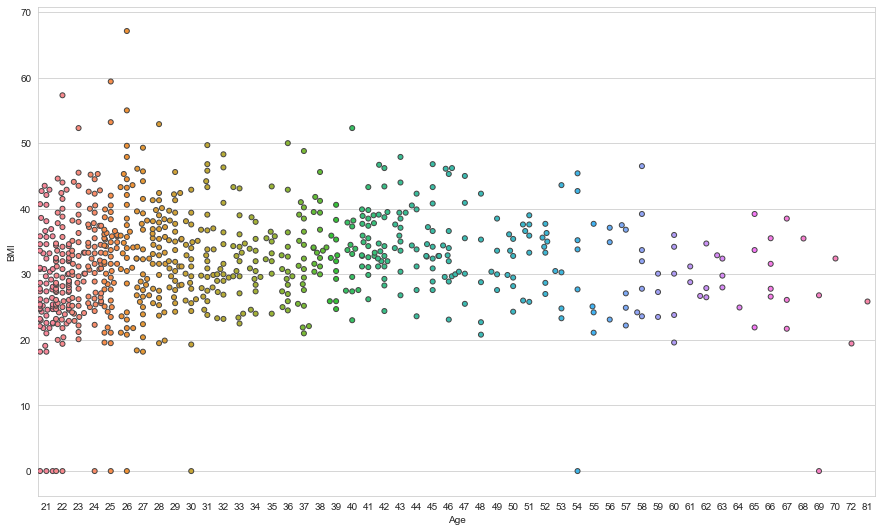

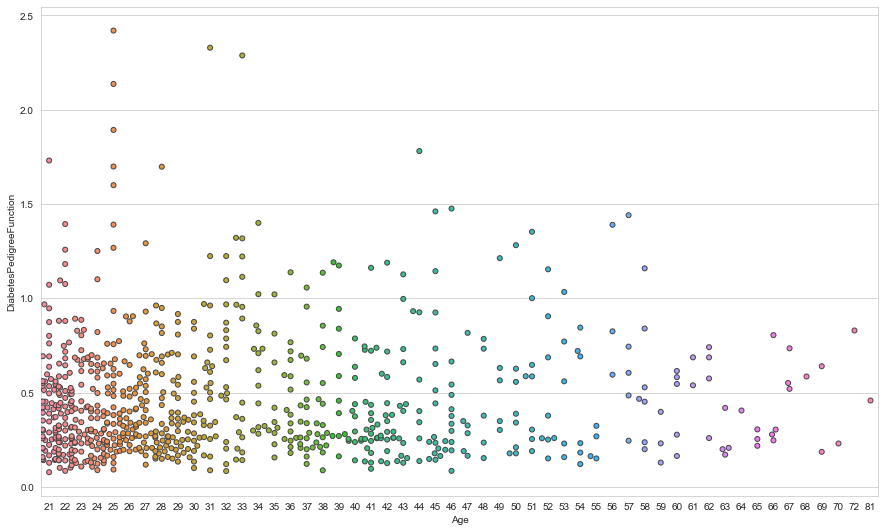

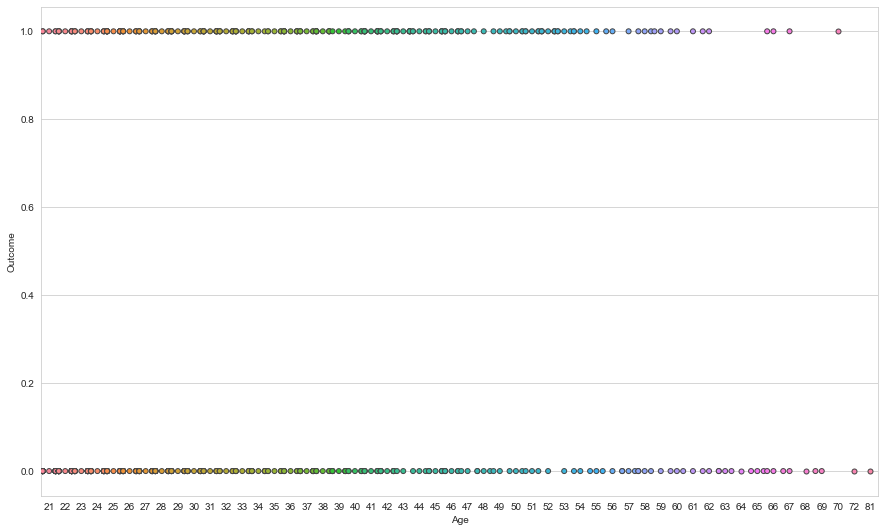

In [68]:
for i in ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Outcome']:
    plt.figure(figsize=(15,9))
    sns.swarmplot(x=df.Age,y=df[i],data=df,linewidth=1)
    plt.show()

In [69]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

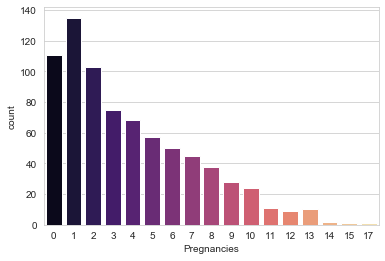

In [70]:
sns.countplot(x='Pregnancies',data=df,palette='magma')

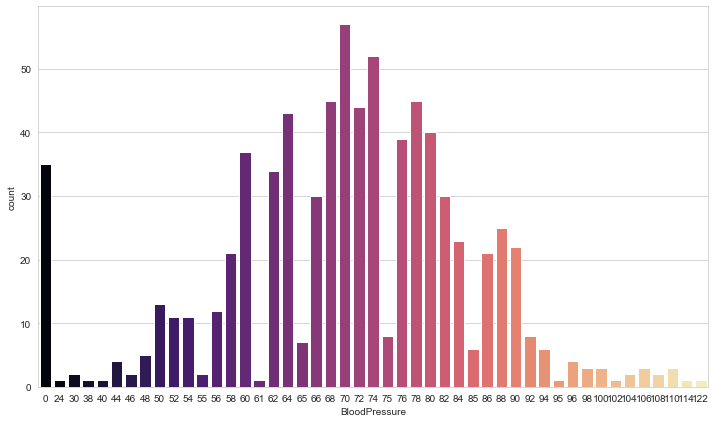

In [73]:
plt.figure(figsize=(12,7))
sns.countplot(x='BloodPressure',data=df,palette='magma')

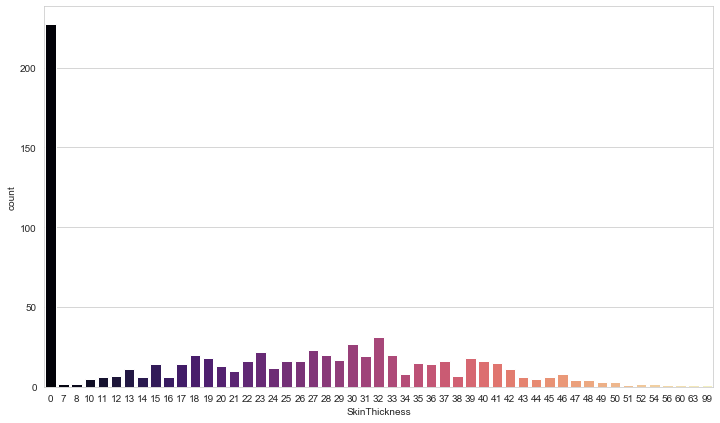

In [75]:
plt.figure(figsize=(12,7))
sns.countplot(x='SkinThickness',data=df,palette='magma')

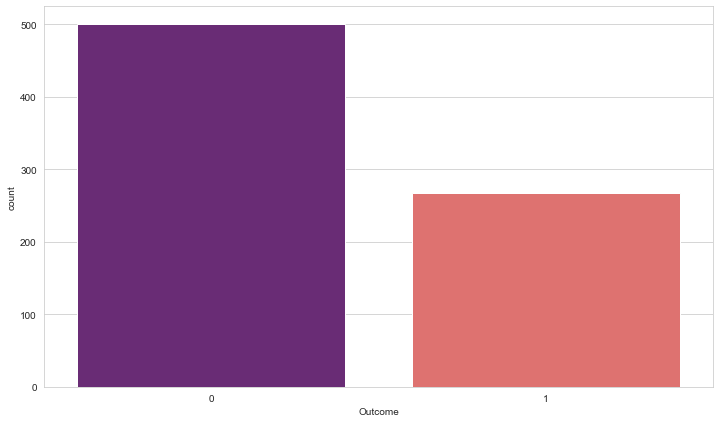

In [78]:
plt.figure(figsize=(12,7))
sns.countplot(x='Outcome',data=df,palette='magma')

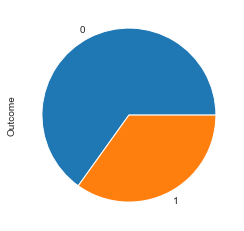

In [79]:
df.Outcome.value_counts().plot(kind='pie')

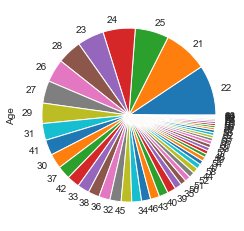

In [81]:
df.Age.value_counts().plot(kind='pie')

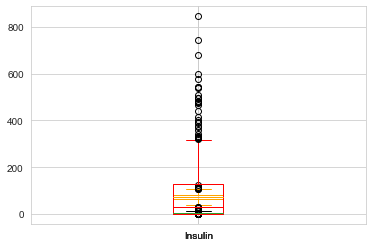

In [82]:
df.boxplot(column="Pregnancies")
df.boxplot(column="BloodPressure",color='orange')
df.boxplot(column="Insulin",color='red')

In [83]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

0    500
1    268
Name: Outcome, dtype: int64

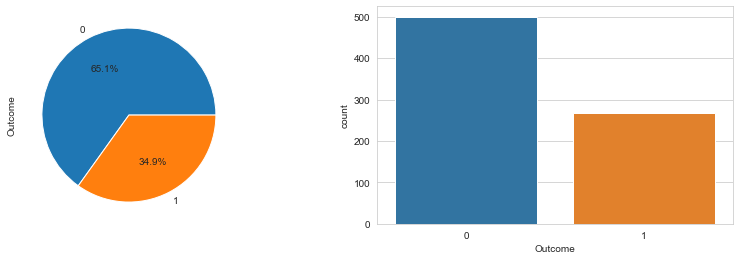

In [84]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
df['Outcome'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['Outcome'])
df['Outcome'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

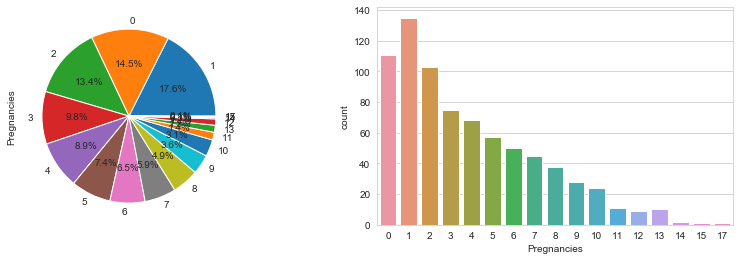

In [86]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
df['Pregnancies'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['Pregnancies'])
df['Pregnancies'].value_counts()

<Figure size 1008x288 with 0 Axes>

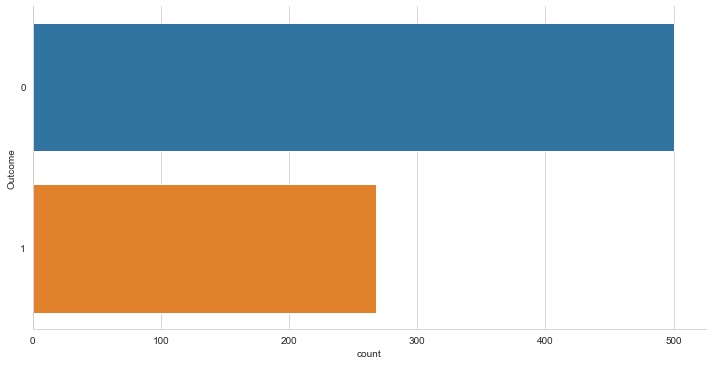

In [92]:
plt.figure(figsize=(14,4))
sns.catplot(y='Outcome', kind='count', aspect=2, data=df)

In [93]:
attFeatures = []
for i in df.columns:
    attFeatures.append([i, df[i].nunique(), df[i].drop_duplicates().values])
pd.DataFrame(attFeatures, columns = ['Features', 'Unique Number', 'Values'])

Features  Unique Number  \
0               Pregnancies             17   
1                   Glucose            136   
2             BloodPressure             47   
3             SkinThickness             51   
4                   Insulin            186   
5                       BMI            248   
6  DiabetesPedigreeFunction            517   
7                       Age             52   
8                   Outcome              2   

                                              Values  
0  [6, 1, 8, 0, 5, 3, 10, 2, 4, 7, 9, 11, 13, 15,...  
1  [148, 85, 183, 89, 137, 116, 78, 115, 197, 125...  
2  [72, 66, 64, 40, 74, 50, 0, 70, 96, 92, 80, 60...  
3  [35, 29, 0, 23, 32, 45, 19, 47, 38, 30, 41, 33...  
4  [0, 94, 168, 88, 543, 846, 175, 230, 83, 96, 2...  
5  [33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31.0, 35....  
6  [0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.2...  
7  [50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 5...  
8                                             [1, 0]

In [94]:
import sweetviz as sv

In [95]:
data=sv.analyze(df)
data.show_html('Analyze.html')

                                             |                                             | [  0%]   00:00 ->…

Report Analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [96]:
from IPython.display import IFrame

In [97]:
IFrame(src='Analyze.html',width=1000,height=600)

In [128]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [129]:
import sklearn.cluster as cluster

In [130]:
kmns=cluster.KMeans(n_clusters=5)
kmns.fit(df[['Pregnancies','Age']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [131]:
kmns.cluster_centers_

array([[ 6.46206897, 39.17931034],
       [ 3.5106383 , 29.74468085],
       [ 7.25842697, 49.        ],
       [ 1.48993289, 23.1409396 ],
       [ 5.54166667, 62.47916667]])

In [132]:
df['Pregnancies by Age']=kmns.labels_

In [133]:
from sklearn.cluster import KMeans 

In [134]:
k_range=range(1,15)
wss=[]

In [136]:
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['Pregnancies','Age']])
    wss.append(km.inertia_)

In [137]:
wss

[114786.99739583333,
 35295.12033035629,
 18189.13180496625,
 12884.273875882573,
 10011.148083322687,
 8347.89820245116,
 7258.349417870268,
 6502.8504042920285,
 5944.143379274293,
 5321.575313077353,
 4827.272063739168,
 4402.747956302943,
 4005.211911758191,
 3857.6043978089474]

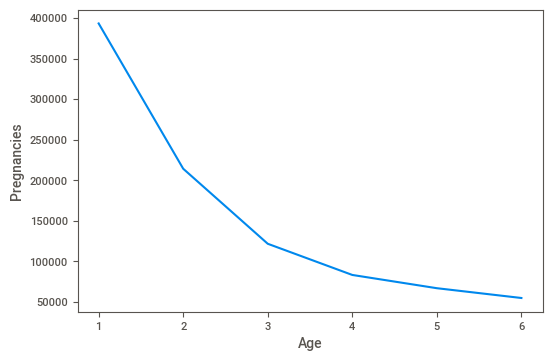

In [146]:
plt.xlabel('Age')
plt.ylabel('Pregnancies')
plt.plot(k_range,wss)

In [139]:
kmns=cluster.KMeans(n_clusters=5)
kmns.fit(df[['BloodPressure','Age']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [140]:
kmns.cluster_centers_

array([[72.86642599, 29.40072202],
       [ 2.21052632, 30.39473684],
       [77.32867133, 52.65034965],
       [58.7020202 , 25.29292929],
       [90.39285714, 32.97321429]])

In [142]:
df['BloodPressure by Age']=kmns.labels_

In [143]:
k_range=range(1,7)
wss=[]

In [144]:
for k in k_range:
    km=cluster.KMeans(n_clusters=k)
    km.fit(df[['BloodPressure','Age']])
    wss.append(km.inertia_)

In [147]:
wss

[393432.8932291666,
 214209.79610670512,
 121650.96605491012,
 83182.71322590535,
 66834.10550574129,
 54757.15704953457]

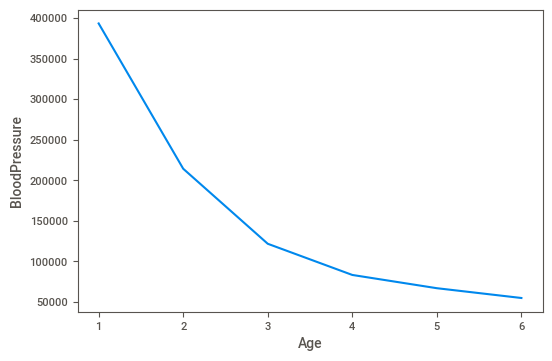

In [148]:
plt.xlabel('Age')
plt.ylabel('BloodPressure')
plt.plot(k_range,wss)